In [1]:
import sys
import os
import itertools
import pandas as pd
current_dir = os.getcwd()
print(current_dir)

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['../../../../UCB-USACE-LSTMs', '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all', '/Users/canruso/Desktop', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python310.zip', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/lib-dynload', '', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages/setuptools/_vendor']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

In [4]:
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

target_path = os.path.join(library_path, 'UCB_training', 'models', 'calpella_all')

if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("calpella")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all
Train Basin File Exists: True


In [5]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("calpella_gage_nlayer.yaml")
path_to_physics_data = Path(library_path + "/russian_river_data/Calpella_hourly.csv")

In [6]:
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
    #    'Lake Mendocino Storage',
]

In [7]:
hyperparam_space = {
    "hidden_size": [64, 128, 256],
    "seq_length": [90, 168, 336],
    "num_layers": [1],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
no_physics_results = []
physics_results = []

NoPhysics: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 00:49:14,684: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_004914/output.log initialized.
2025-02-14 00:49:14,685: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_004914
2025-02-14 00:49:14,685: ### Run configurations for testing_run
2025-02-14 00:49:14,686: experiment_name: testing_run
2025-02-14 00:49:14,686: train_basin_file: calpella
2025-02-14 00:49:14,687: validation_basin_file: calpella
2025-02-14 00:49:14,687: test_basin_file: calpella
2025-02-14 00:49:14,687: train_start_date: 1994-10-01 00:00:00
2025-02-14 00:49:14,688: train_end_date: 2002-09-30 00:00:00
2025-02-14 00:49:14,688: validation_start_date: 2002-10-01 00:00:00
2025-02-14 00:49:14,689: validation_end_date: 2005-09-30 00:00:00
2025-02-14 00:49:14,689: test_start_date: 

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:07<00:00,  7.49s/it]
2025-02-14 00:55:29,338: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_004914/validation/model_epoch016/validation_metrics.csv
2025-02-14 00:55:29,339: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_004914/validation/model_epoch016/validation_results.p
got predictions


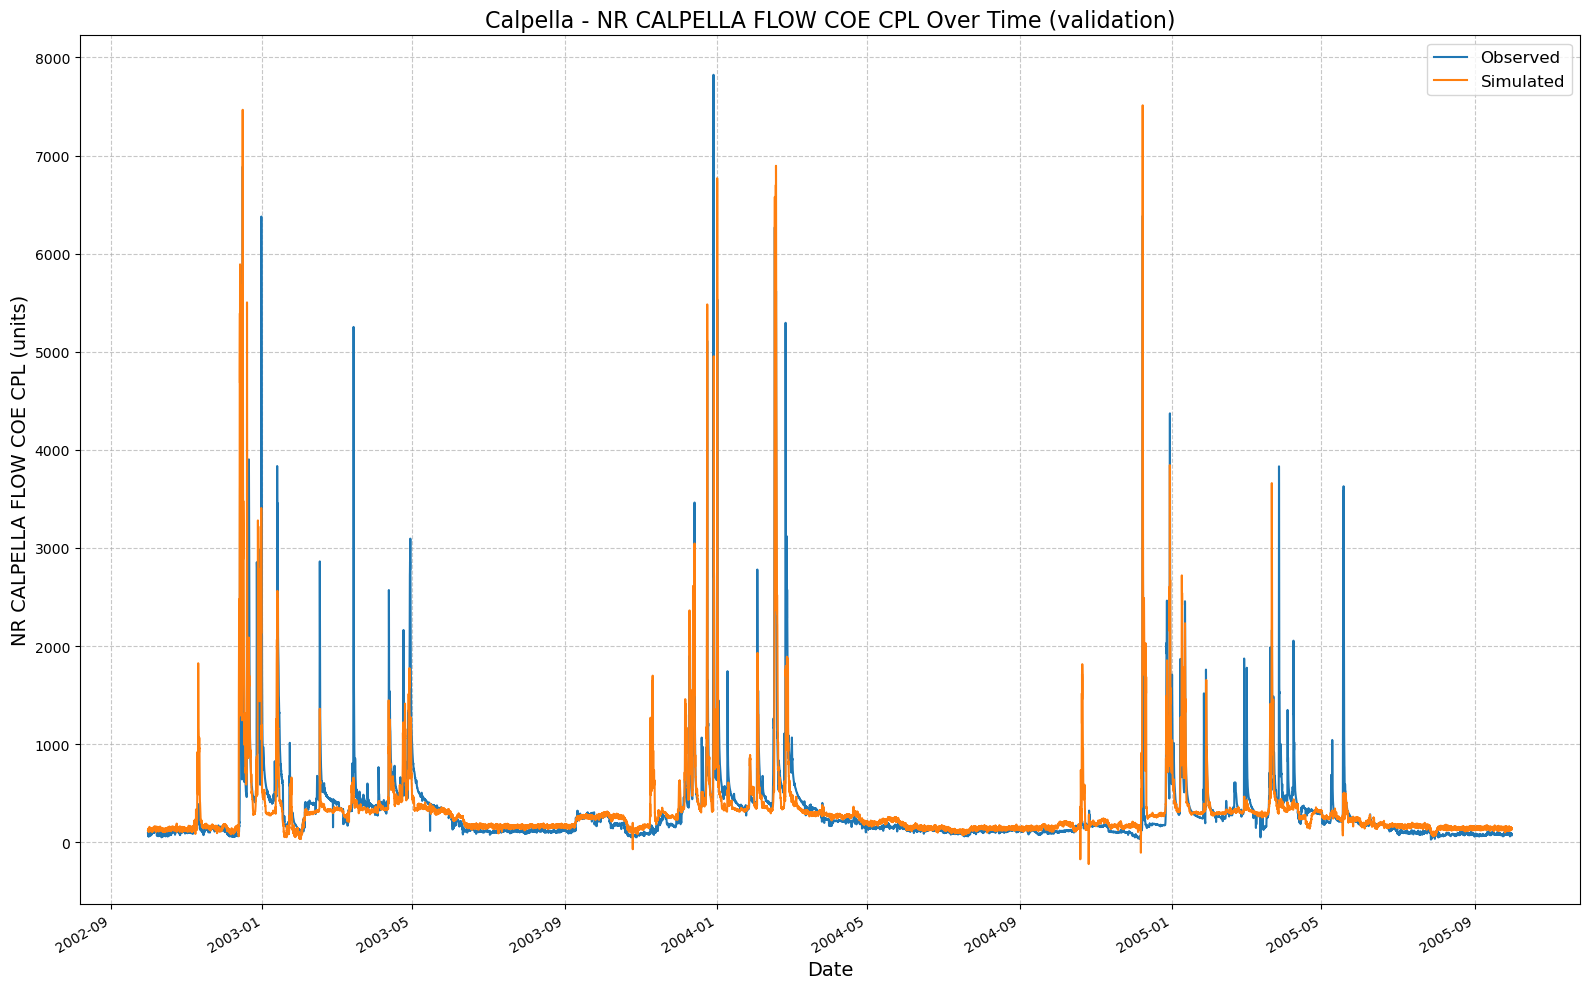

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_004914/results_output_validation.csv
NoPhysics: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 00:55:29,653: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_005529/output.log initialized.
2025-02-14 00:55:29,653: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_005529
2025-02-14 00:55:29,654: ### Run configurations for testing_run
2025-02-14 00:55:29,654: experiment_name: testing_run
2025-02-14 00:55:29,654: train_basin_file: calpella
2025-02-14 00:55:29,655: validation_basin_file: calpella
2025-02-14 00:55:29,655: test_basin_file: calpella
2025-02-14 00:55:29,655: train_start_date: 1994-10-01 00:00:00
2025-02-14 00:55:29,656: train_end_date: 2002-09-30 00:00:00
2025-02-14 00:55:

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]
2025-02-14 00:55:30,893: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 568.49it/s]
2025-02-14 00:55:30,900: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [00:20<00:00, 12.09it/s, Loss: 0.0000]
2025-02-14 00:55:52,603: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [00:23<00:00, 10.45it/s, Loss: 0.0000]
2025-02-14 00:56:16,433: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [00:22<00:00, 11.15it/s, Loss: 0.0000]
2025-02-14 00:56:38,775: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [00:18<00:00, 13.13it/s, Loss: 0.0000]
2025-02-14 00:56:57,745: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [00:21<00:00, 11.66it/s, Loss: 0.0000]
2025-02-14 00:57:19,109: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:07<00:00,  7.15s/it]
2025-02-14 01:07:04,924: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_005529/validation/model_epoch032/validation_metrics.csv
2025-02-14 01:07:04,928: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_005529/validation/model_epoch032/validation_results.p
got predictions


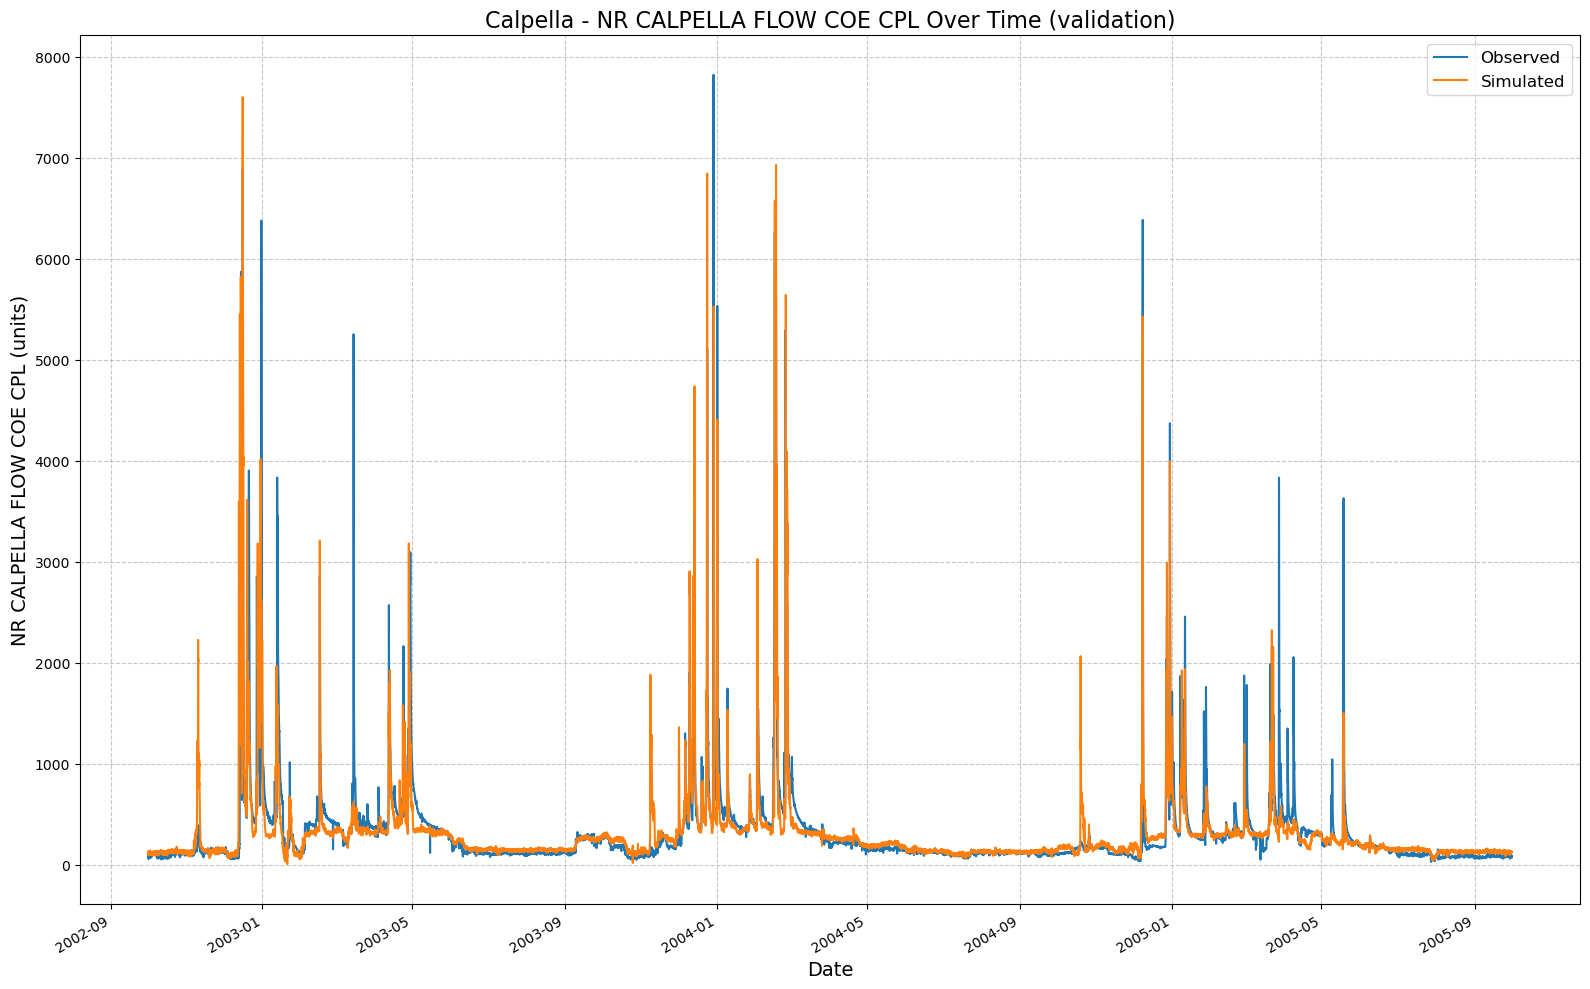

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_005529/results_output_validation.csv
NoPhysics: {'hidden_size': 64, 'seq_length': 168, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 01:07:05,259: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_010705/output.log initialized.
2025-02-14 01:07:05,259: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_010705
2025-02-14 01:07:05,259: ### Run configurations for testing_run
2025-02-14 01:07:05,260: experiment_name: testing_run
2025-02-14 01:07:05,260: train_basin_file: calpella
2025-02-14 01:07:05,261: validation_basin_file: calpella
2025-02-14 01:07:05,261: test_basin_file: calpella
2025-02-14 01:07:05,262: train_start_date: 1994-10-01 00:00:00
2025-02-14 01:07:05,263: train_end_date: 2002-09-30 00:00:00
2025-02-14 01:07

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]
2025-02-14 01:07:06,536: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 187.68it/s]
2025-02-14 01:07:06,550: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [00:38<00:00,  6.42it/s, Loss: 0.0000]
2025-02-14 01:07:45,869: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [00:38<00:00,  6.47it/s, Loss: 0.0000]
2025-02-14 01:08:24,350: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [00:39<00:00,  6.32it/s, Loss: 0.0000]
2025-02-14 01:09:03,744: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [00:39<00:00,  6.31it/s, Loss: 0.0000]
2025-02-14 01:09:43,202: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [00:40<00:00,  6.19it/s, Loss: 0.0000]
2025-02-14 01:10:23,454: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:10<00:00, 10.31s/it]
2025-02-14 01:18:05,888: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_010705/validation/model_epoch016/validation_metrics.csv
2025-02-14 01:18:05,891: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_010705/validation/model_epoch016/validation_results.p
got predictions


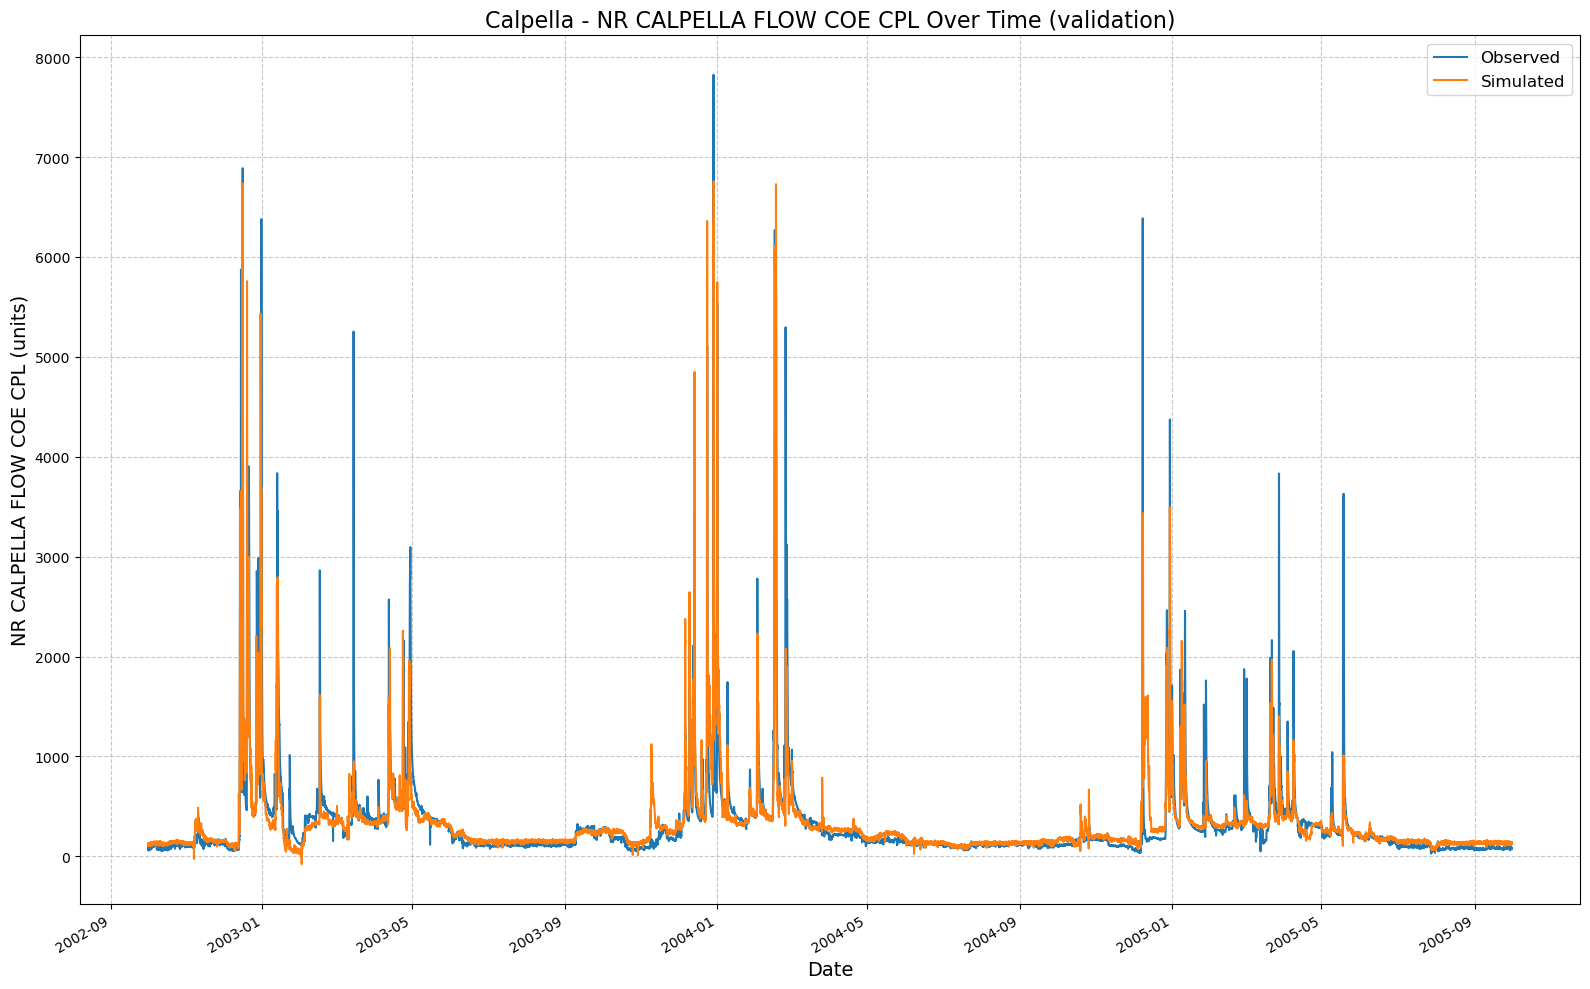

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_010705/results_output_validation.csv
NoPhysics: {'hidden_size': 64, 'seq_length': 168, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 01:18:06,222: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_011806/output.log initialized.
2025-02-14 01:18:06,223: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_011806
2025-02-14 01:18:06,223: ### Run configurations for testing_run
2025-02-14 01:18:06,224: experiment_name: testing_run
2025-02-14 01:18:06,224: train_basin_file: calpella
2025-02-14 01:18:06,225: validation_basin_file: calpella
2025-02-14 01:18:06,225: test_basin_file: calpella
2025-02-14 01:18:06,226: train_start_date: 1994-10-01 00:00:00
2025-02-14 01:18:06,226: train_end_date: 2002-09-30 00:00:00
2025-02-14 01:18

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]
2025-02-14 01:18:07,532: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 207.60it/s]
2025-02-14 01:18:07,544: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [00:36<00:00,  6.76it/s, Loss: 0.0000]
2025-02-14 01:18:45,025: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [00:35<00:00,  6.92it/s, Loss: 0.0000]
2025-02-14 01:19:21,002: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [00:38<00:00,  6.53it/s, Loss: 0.0000]
2025-02-14 01:19:59,163: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [00:41<00:00,  5.99it/s, Loss: 0.0000]
2025-02-14 01:20:40,720: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [00:36<00:00,  6.91it/s, Loss: 0.0000]
2025-02-14 01:21:16,738: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:09<00:00,  9.67s/it]
2025-02-14 01:39:10,355: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_011806/validation/model_epoch032/validation_metrics.csv
2025-02-14 01:39:10,358: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_011806/validation/model_epoch032/validation_results.p
got predictions


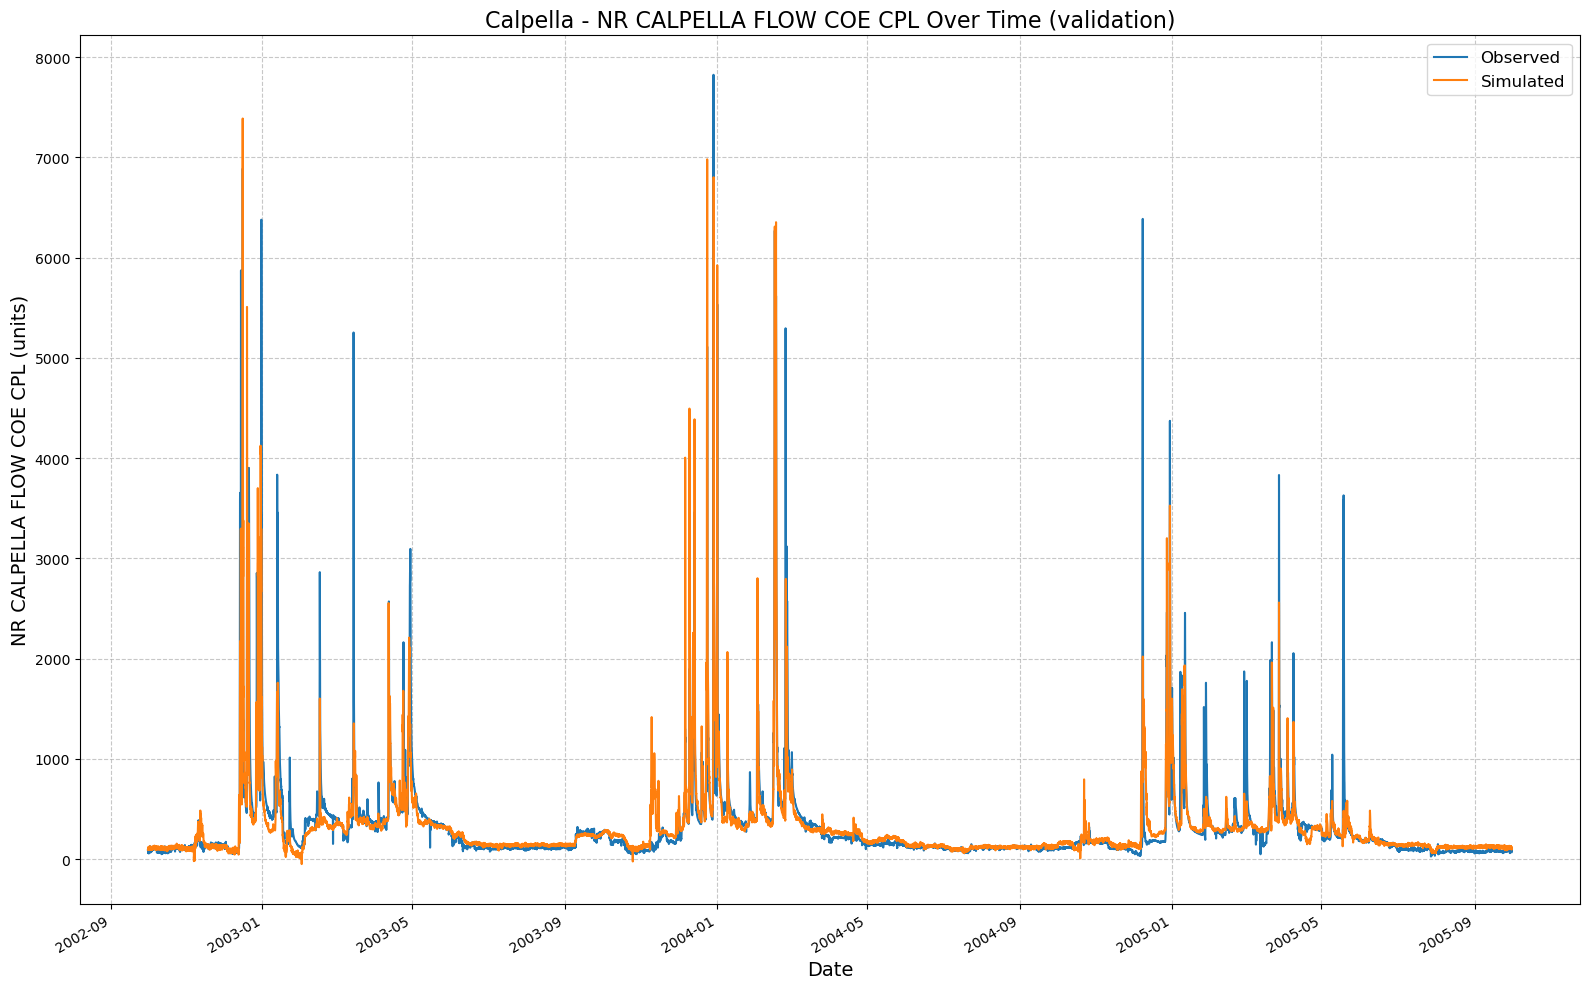

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_011806/results_output_validation.csv
NoPhysics: {'hidden_size': 64, 'seq_length': 336, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 01:39:10,682: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_013910/output.log initialized.
2025-02-14 01:39:10,682: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_013910
2025-02-14 01:39:10,683: ### Run configurations for testing_run
2025-02-14 01:39:10,683: experiment_name: testing_run
2025-02-14 01:39:10,684: train_basin_file: calpella
2025-02-14 01:39:10,684: validation_basin_file: calpella
2025-02-14 01:39:10,684: test_basin_file: calpella
2025-02-14 01:39:10,685: train_start_date: 1994-10-01 00:00:00
2025-02-14 01:39:10,685: train_end_date: 2002-09-30 00:00:00
2025-02-14 01:39

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]
2025-02-14 01:39:12,008: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 161.74it/s]
2025-02-14 01:39:12,021: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [01:14<00:00,  3.34it/s, Loss: 0.0000]
2025-02-14 01:40:27,200: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [01:16<00:00,  3.27it/s, Loss: 0.0000]
2025-02-14 01:41:43,342: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [01:15<00:00,  3.28it/s, Loss: 0.0000]
2025-02-14 01:42:59,188: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [01:14<00:00,  3.34it/s, Loss: 0.0000]
2025-02-14 01:44:13,688: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [01:18<00:00,  3.19it/s, Loss: 0.0000]
2025-02-14 01:45:31,704: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:18<00:00, 18.57s/it]
2025-02-14 02:00:51,043: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_013910/validation/model_epoch016/validation_metrics.csv
2025-02-14 02:00:51,046: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_013910/validation/model_epoch016/validation_results.p
got predictions


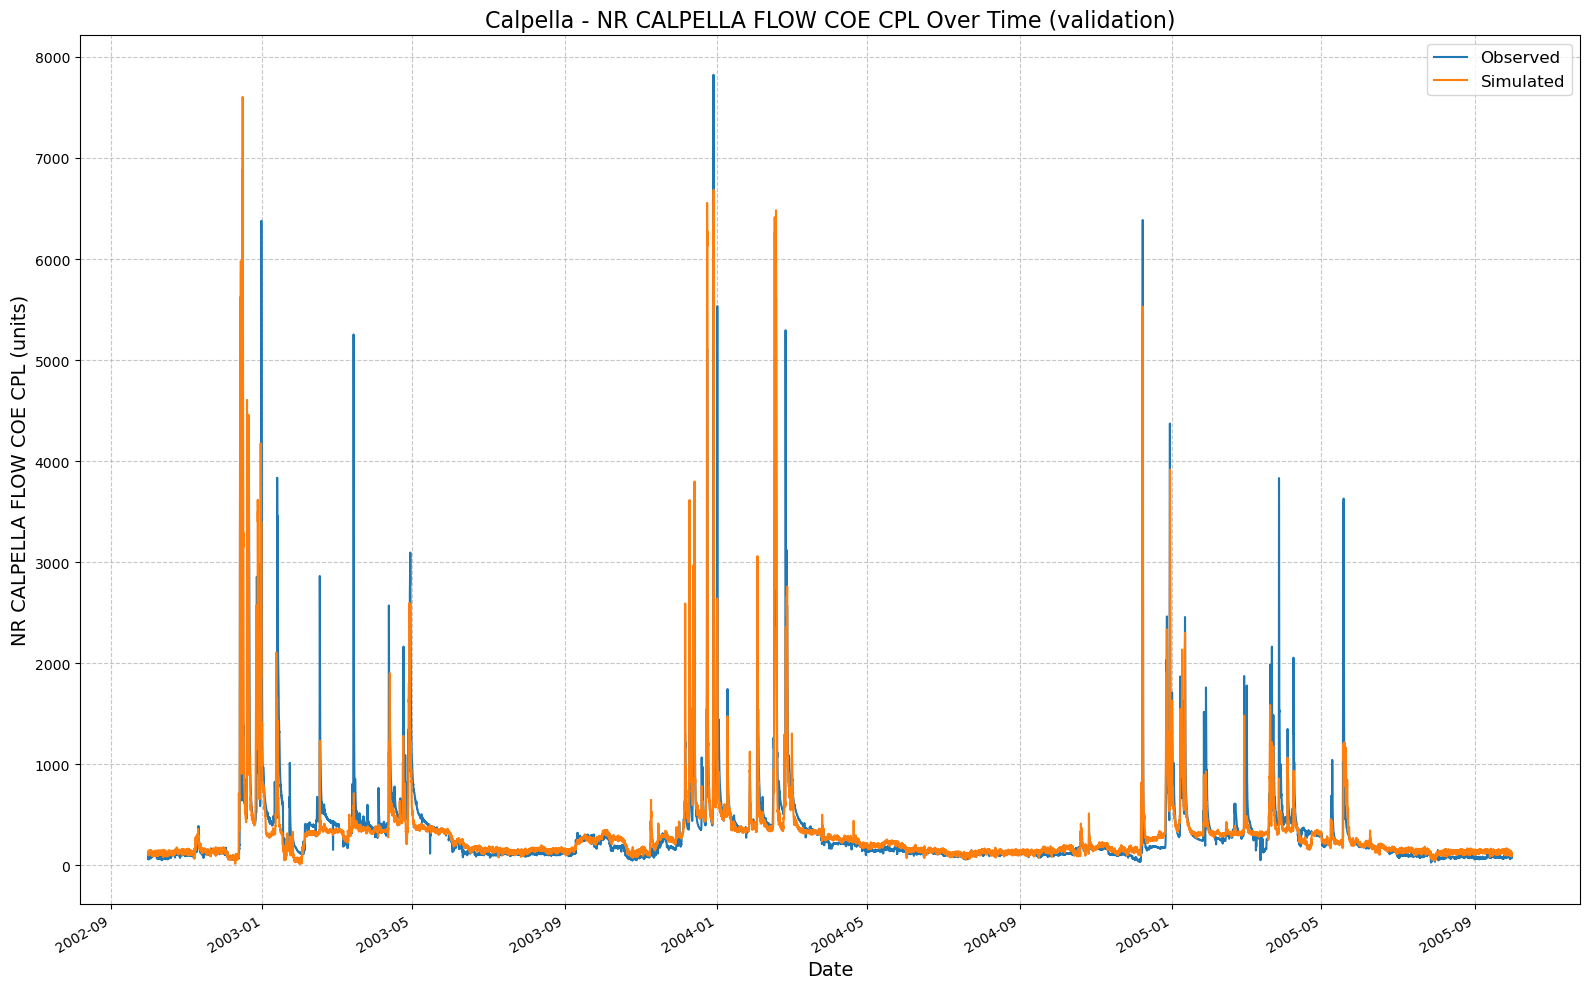

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_013910/results_output_validation.csv
NoPhysics: {'hidden_size': 64, 'seq_length': 336, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 02:00:51,398: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_020051/output.log initialized.
2025-02-14 02:00:51,399: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_020051
2025-02-14 02:00:51,399: ### Run configurations for testing_run
2025-02-14 02:00:51,400: experiment_name: testing_run
2025-02-14 02:00:51,400: train_basin_file: calpella
2025-02-14 02:00:51,400: validation_basin_file: calpella
2025-02-14 02:00:51,401: test_basin_file: calpella
2025-02-14 02:00:51,401: train_start_date: 1994-10-01 00:00:00
2025-02-14 02:00:51,402: train_end_date: 2002-09-30 00:00:00
2025-02-14 02:00

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]
2025-02-14 02:00:52,617: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 234.96it/s]
2025-02-14 02:00:52,631: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [01:18<00:00,  3.17it/s, Loss: 0.0000]
2025-02-14 02:02:11,944: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [01:22<00:00,  3.02it/s, Loss: 0.0000]
2025-02-14 02:03:34,486: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [01:13<00:00,  3.37it/s, Loss: 0.0000]
2025-02-14 02:04:48,428: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [01:18<00:00,  3.18it/s, Loss: 0.0000]
2025-02-14 02:06:06,759: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [01:20<00:00,  3.08it/s, Loss: 0.0000]
2025-02-14 02:07:27,603: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:18<00:00, 18.34s/it]
2025-02-14 02:43:19,798: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_020051/validation/model_epoch032/validation_metrics.csv
2025-02-14 02:43:19,801: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_020051/validation/model_epoch032/validation_results.p
got predictions


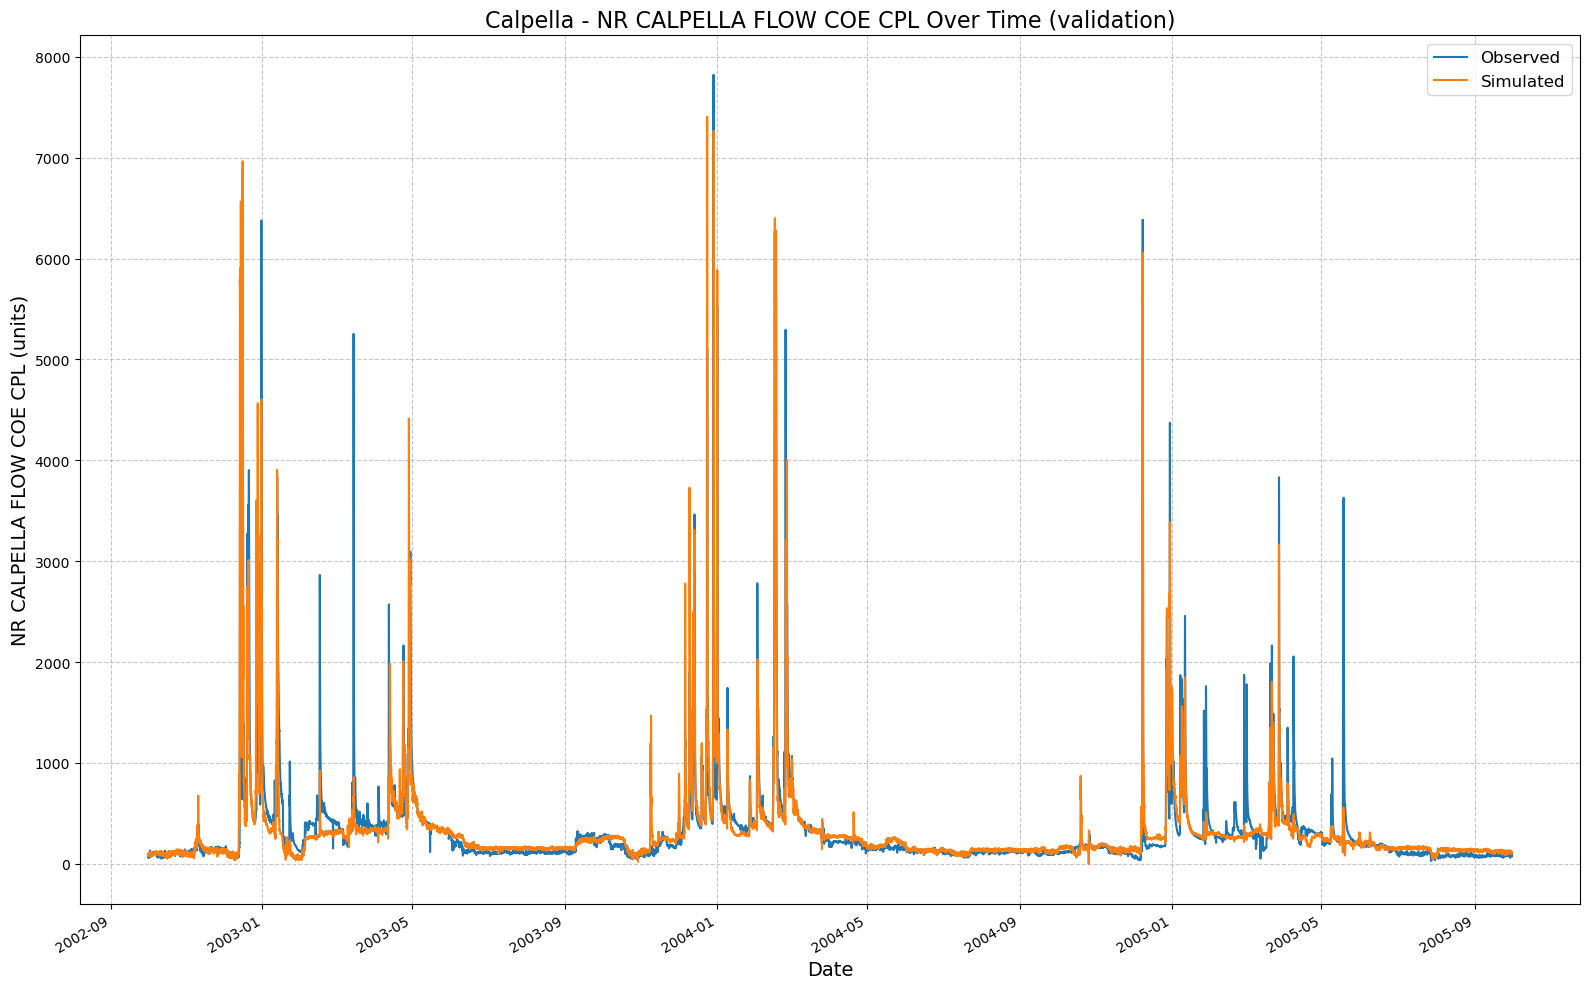

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_020051/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 02:43:20,135: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_024320/output.log initialized.
2025-02-14 02:43:20,135: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_024320
2025-02-14 02:43:20,136: ### Run configurations for testing_run
2025-02-14 02:43:20,137: experiment_name: testing_run
2025-02-14 02:43:20,138: train_basin_file: calpella
2025-02-14 02:43:20,139: validation_basin_file: calpella
2025-02-14 02:43:20,139: test_basin_file: calpella
2025-02-14 02:43:20,140: train_start_date: 1994-10-01 00:00:00
2025-02-14 02:43:20,141: train_end_date: 2002-09-30 00:00:00
2025-02-14 02:43

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]
2025-02-14 02:43:21,503: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 295.33it/s]
2025-02-14 02:43:21,513: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [00:37<00:00,  6.65it/s, Loss: 0.0000]
2025-02-14 02:43:59,455: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [00:37<00:00,  6.60it/s, Loss: 0.0000]
2025-02-14 02:44:37,174: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [00:38<00:00,  6.49it/s, Loss: 0.0000]
2025-02-14 02:45:15,527: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [00:37<00:00,  6.71it/s, Loss: 0.0000]
2025-02-14 02:45:52,664: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [00:37<00:00,  6.62it/s, Loss: 0.0000]
2025-02-14 02:46:30,257: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:07<00:00,  7.62s/it]
2025-02-14 02:53:54,972: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_024320/validation/model_epoch016/validation_metrics.csv
2025-02-14 02:53:54,977: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_024320/validation/model_epoch016/validation_results.p
got predictions


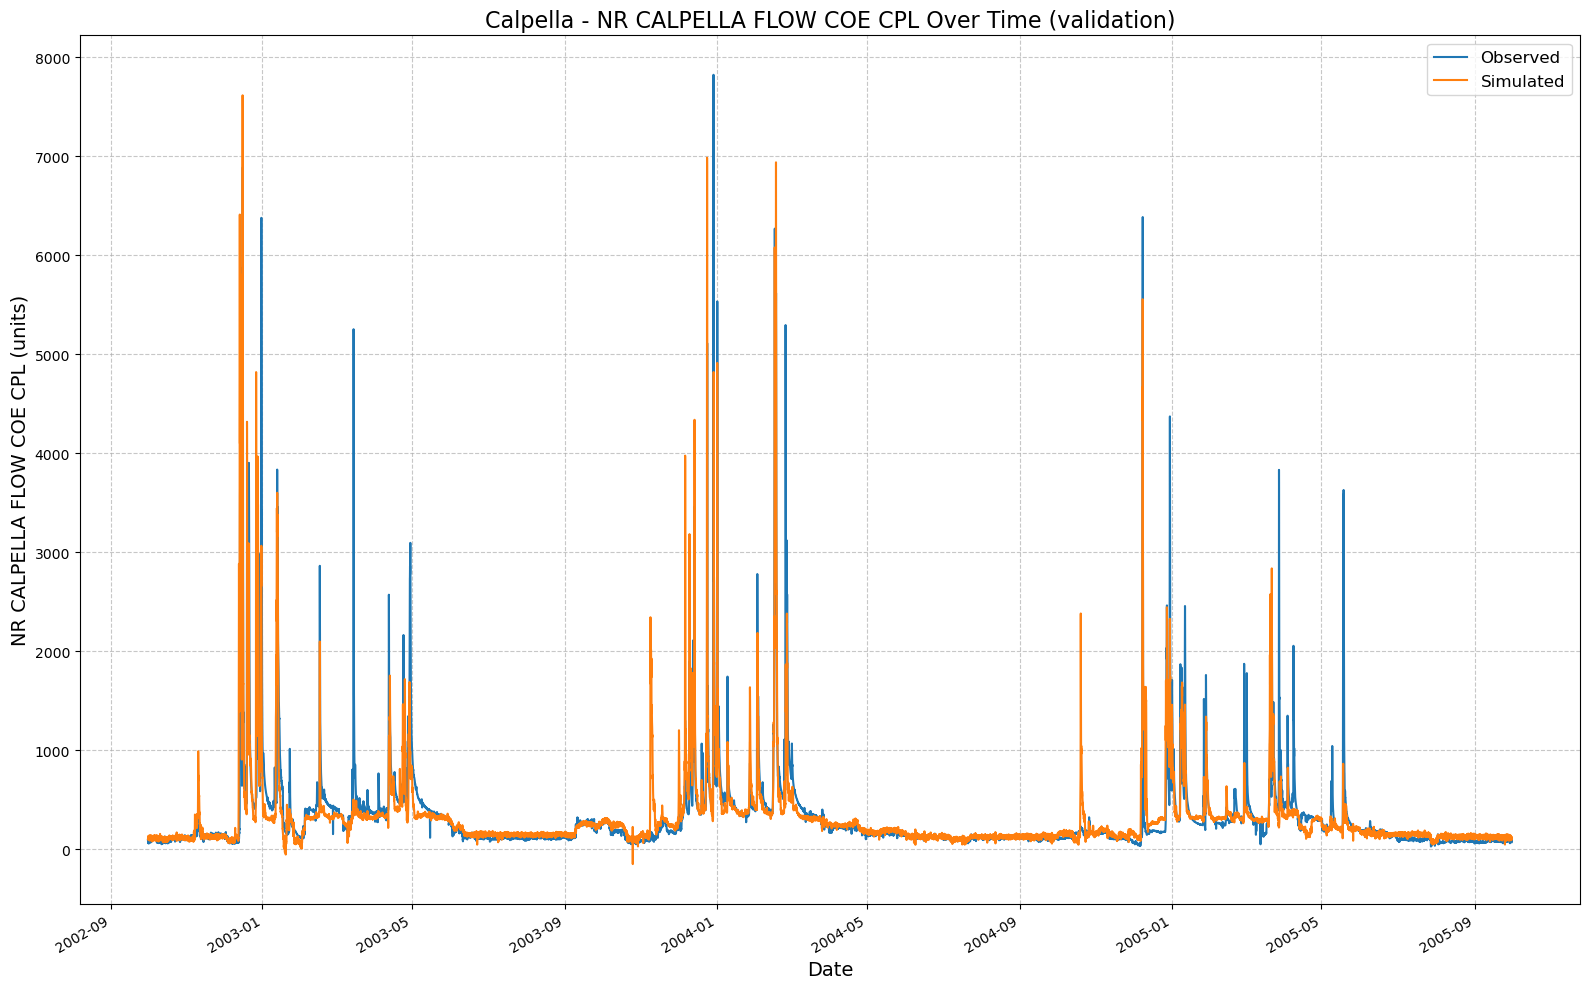

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_024320/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 02:53:55,286: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_025355/output.log initialized.
2025-02-14 02:53:55,287: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_025355
2025-02-14 02:53:55,287: ### Run configurations for testing_run
2025-02-14 02:53:55,287: experiment_name: testing_run
2025-02-14 02:53:55,288: train_basin_file: calpella
2025-02-14 02:53:55,288: validation_basin_file: calpella
2025-02-14 02:53:55,289: test_basin_file: calpella
2025-02-14 02:53:55,289: train_start_date: 1994-10-01 00:00:00
2025-02-14 02:53:55,289: train_end_date: 2002-09-30 00:00:00
2025-02-14 02:53

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.10s/it]
2025-02-14 02:53:56,419: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 515.52it/s]
2025-02-14 02:53:56,427: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [00:36<00:00,  6.85it/s, Loss: 0.0000]
2025-02-14 02:54:33,312: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [00:37<00:00,  6.58it/s, Loss: 0.0000]
2025-02-14 02:55:11,179: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [00:37<00:00,  6.65it/s, Loss: 0.0000]
2025-02-14 02:55:48,658: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [00:38<00:00,  6.54it/s, Loss: 0.0000]
2025-02-14 02:56:26,772: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [00:35<00:00,  7.01it/s, Loss: 0.0000]
2025-02-14 02:57:02,282: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:08<00:00,  8.83s/it]
2025-02-14 03:14:35,892: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_025355/validation/model_epoch032/validation_metrics.csv
2025-02-14 03:14:35,894: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_025355/validation/model_epoch032/validation_results.p
got predictions


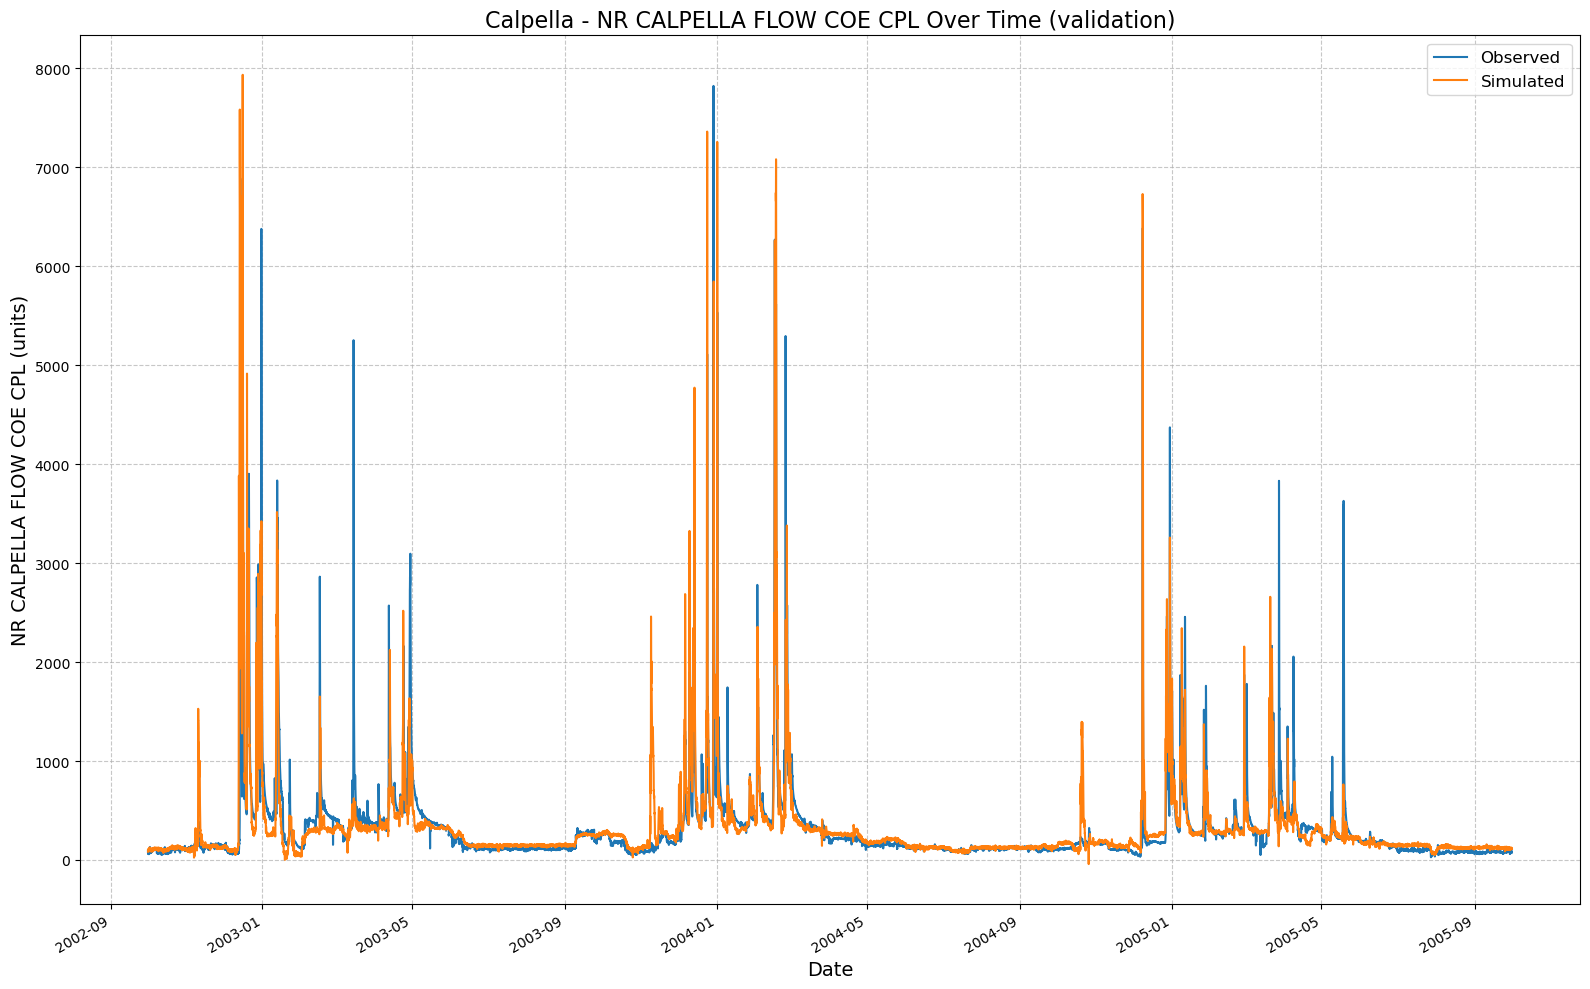

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_025355/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 168, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 03:14:36,246: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_031436/output.log initialized.
2025-02-14 03:14:36,247: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_031436
2025-02-14 03:14:36,248: ### Run configurations for testing_run
2025-02-14 03:14:36,248: experiment_name: testing_run
2025-02-14 03:14:36,249: train_basin_file: calpella
2025-02-14 03:14:36,249: validation_basin_file: calpella
2025-02-14 03:14:36,250: test_basin_file: calpella
2025-02-14 03:14:36,251: train_start_date: 1994-10-01 00:00:00
2025-02-14 03:14:36,251: train_end_date: 2002-09-30 00:00:00
2025-02-14 03:1

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]
2025-02-14 03:14:37,643: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 132.10it/s]
2025-02-14 03:14:37,660: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [01:10<00:00,  3.55it/s, Loss: 0.0000]
2025-02-14 03:15:48,554: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [01:08<00:00,  3.63it/s, Loss: 0.0000]
2025-02-14 03:16:57,176: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [01:09<00:00,  3.57it/s, Loss: 0.0000]
2025-02-14 03:18:07,002: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [01:07<00:00,  3.69it/s, Loss: 0.0000]
2025-02-14 03:19:14,506: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [01:13<00:00,  3.41it/s, Loss: 0.0000]
2025-02-14 03:20:27,547: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:16<00:00, 16.97s/it]
2025-02-14 03:34:43,677: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_031436/validation/model_epoch016/validation_metrics.csv
2025-02-14 03:34:43,681: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_031436/validation/model_epoch016/validation_results.p
got predictions


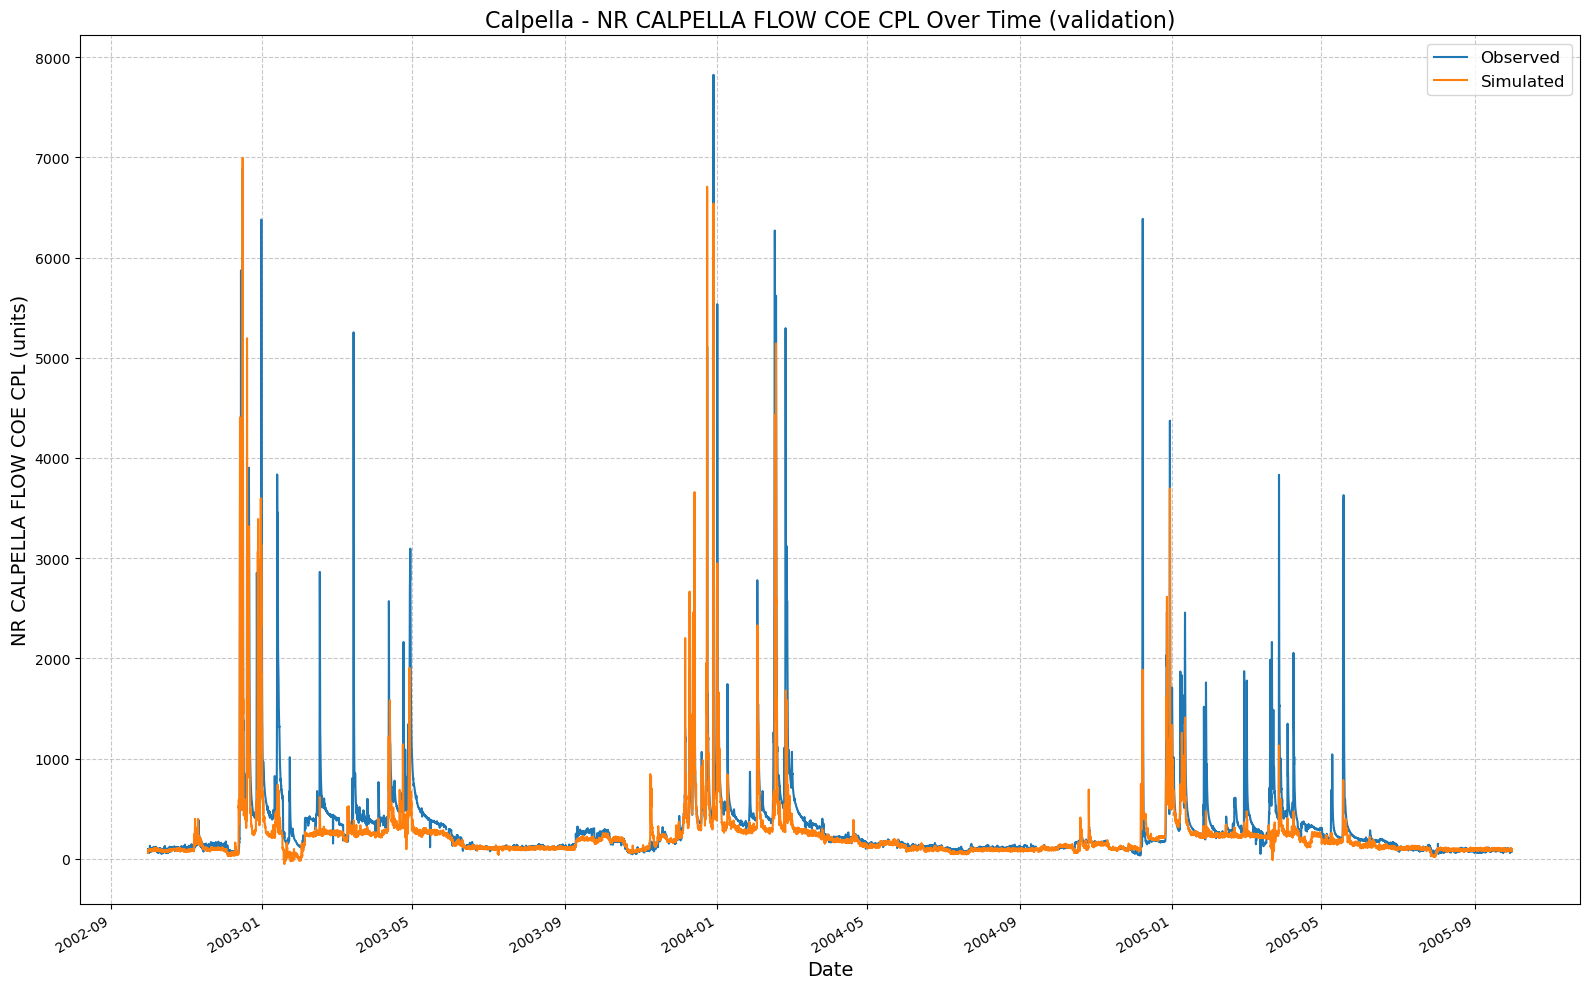

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_031436/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 168, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 03:34:44,030: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_033444/output.log initialized.
2025-02-14 03:34:44,030: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_033444
2025-02-14 03:34:44,031: ### Run configurations for testing_run
2025-02-14 03:34:44,031: experiment_name: testing_run
2025-02-14 03:34:44,032: train_basin_file: calpella
2025-02-14 03:34:44,032: validation_basin_file: calpella
2025-02-14 03:34:44,033: test_basin_file: calpella
2025-02-14 03:34:44,033: train_start_date: 1994-10-01 00:00:00
2025-02-14 03:34:44,033: train_end_date: 2002-09-30 00:00:00
2025-02-14 03:3

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
2025-02-14 03:34:45,259: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 457.84it/s]
2025-02-14 03:34:45,267: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [01:12<00:00,  3.44it/s, Loss: 0.0000]
2025-02-14 03:35:58,245: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [01:11<00:00,  3.48it/s, Loss: 0.0000]
2025-02-14 03:37:09,834: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [01:19<00:00,  3.13it/s, Loss: 0.0000]
2025-02-14 03:38:29,325: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [01:12<00:00,  3.44it/s, Loss: 0.0000]
2025-02-14 03:39:41,806: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [01:12<00:00,  3.42it/s, Loss: 0.0000]
2025-02-14 03:40:54,619: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:16<00:00, 16.15s/it]
2025-02-14 04:16:18,079: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_033444/validation/model_epoch032/validation_metrics.csv
2025-02-14 04:16:18,081: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_033444/validation/model_epoch032/validation_results.p
got predictions


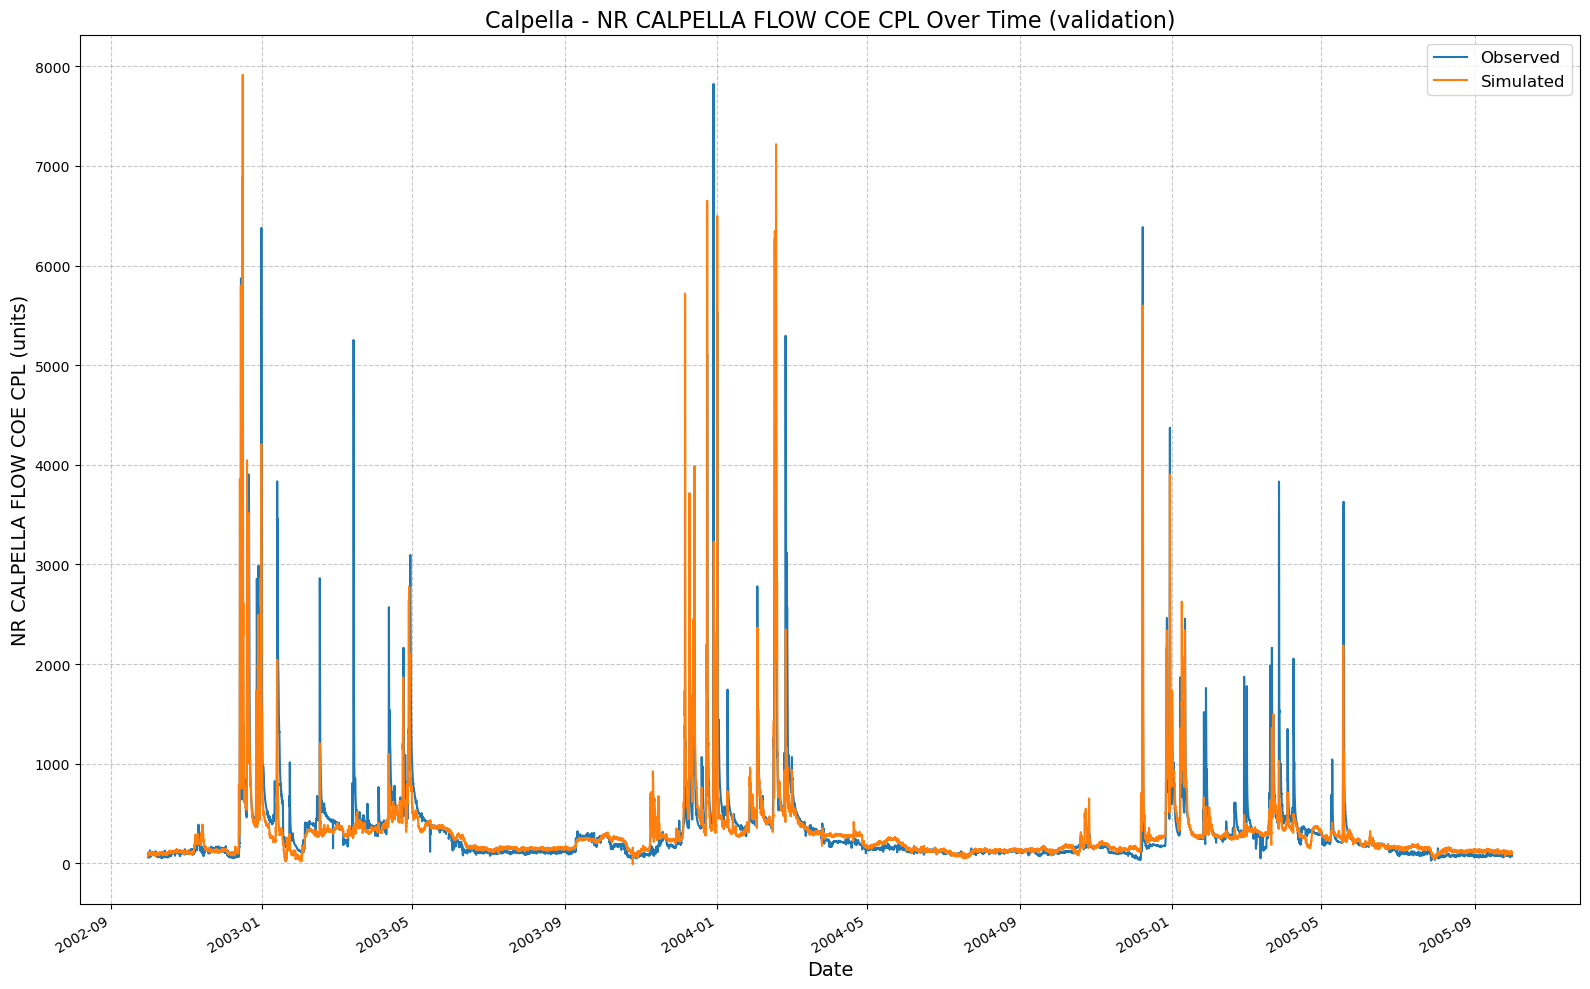

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_033444/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 336, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 04:16:18,436: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_041618/output.log initialized.
2025-02-14 04:16:18,437: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_041618
2025-02-14 04:16:18,437: ### Run configurations for testing_run
2025-02-14 04:16:18,437: experiment_name: testing_run
2025-02-14 04:16:18,438: train_basin_file: calpella
2025-02-14 04:16:18,438: validation_basin_file: calpella
2025-02-14 04:16:18,438: test_basin_file: calpella
2025-02-14 04:16:18,439: train_start_date: 1994-10-01 00:00:00
2025-02-14 04:16:18,439: train_end_date: 2002-09-30 00:00:00
2025-02-14 04:1

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]
2025-02-14 04:16:19,652: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 247.41it/s]
2025-02-14 04:16:19,663: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [02:46<00:00,  1.49it/s, Loss: 0.0000]
2025-02-14 04:19:07,038: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [02:56<00:00,  1.41it/s, Loss: 0.0000]
2025-02-14 04:22:03,371: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [02:50<00:00,  1.46it/s, Loss: 0.0000]
2025-02-14 04:24:54,163: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [02:39<00:00,  1.56it/s, Loss: 0.0000]
2025-02-14 04:27:34,140: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [02:44<00:00,  1.52it/s, Loss: 0.0000]
2025-02-14 04:30:18,257: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:31<00:00, 31.13s/it]
2025-02-14 05:01:27,261: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_041618/validation/model_epoch016/validation_metrics.csv
2025-02-14 05:01:27,265: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_041618/validation/model_epoch016/validation_results.p
got predictions


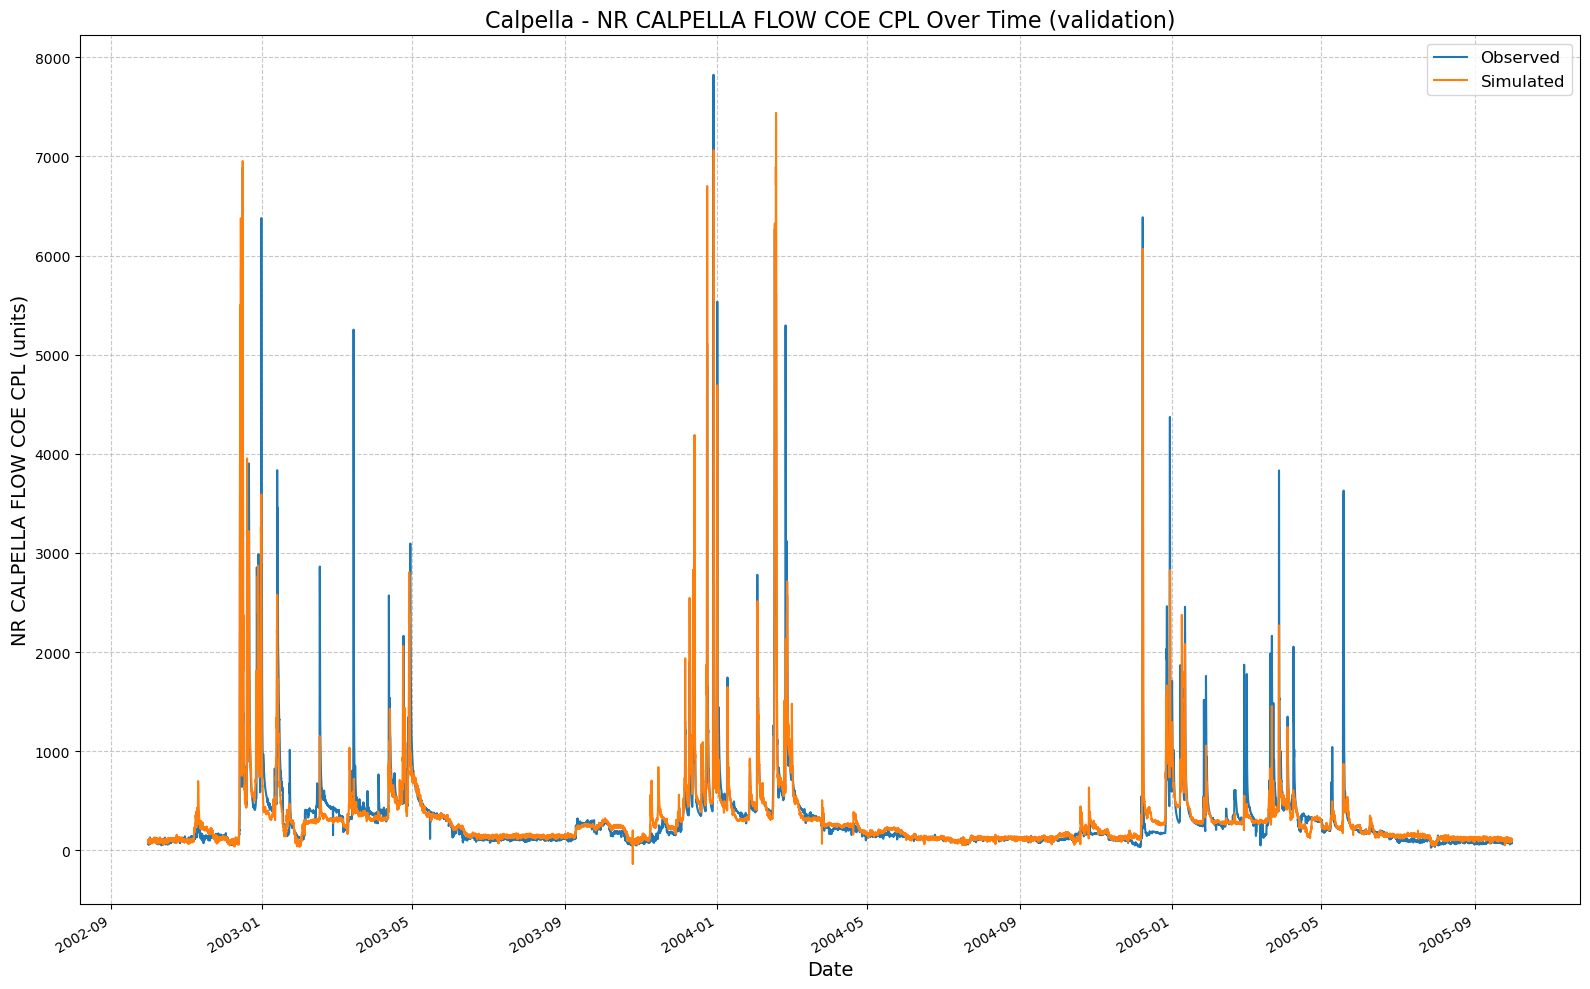

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_041618/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 336, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 05:01:27,659: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_050127/output.log initialized.
2025-02-14 05:01:27,660: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_050127
2025-02-14 05:01:27,660: ### Run configurations for testing_run
2025-02-14 05:01:27,661: experiment_name: testing_run
2025-02-14 05:01:27,661: train_basin_file: calpella
2025-02-14 05:01:27,662: validation_basin_file: calpella
2025-02-14 05:01:27,663: test_basin_file: calpella
2025-02-14 05:01:27,663: train_start_date: 1994-10-01 00:00:00
2025-02-14 05:01:27,664: train_end_date: 2002-09-30 00:00:00
2025-02-14 05:0

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
2025-02-14 05:01:28,899: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 244.61it/s]
2025-02-14 05:01:28,916: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [02:54<00:00,  1.43it/s, Loss: 0.0000]
2025-02-14 05:04:23,834: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [02:43<00:00,  1.52it/s, Loss: 0.0000]
2025-02-14 05:07:07,732: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [02:47<00:00,  1.48it/s, Loss: 0.0000]
2025-02-14 05:09:55,618: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [02:49<00:00,  1.47it/s, Loss: 0.0000]
2025-02-14 05:12:44,857: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [02:50<00:00,  1.46it/s, Loss: 0.0000]
2025-02-14 05:15:34,969: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:21<00:00, 21.33s/it]
2025-02-14 06:04:59,135: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_050127/validation/model_epoch032/validation_metrics.csv
2025-02-14 06:04:59,136: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_050127/validation/model_epoch032/validation_results.p
got predictions


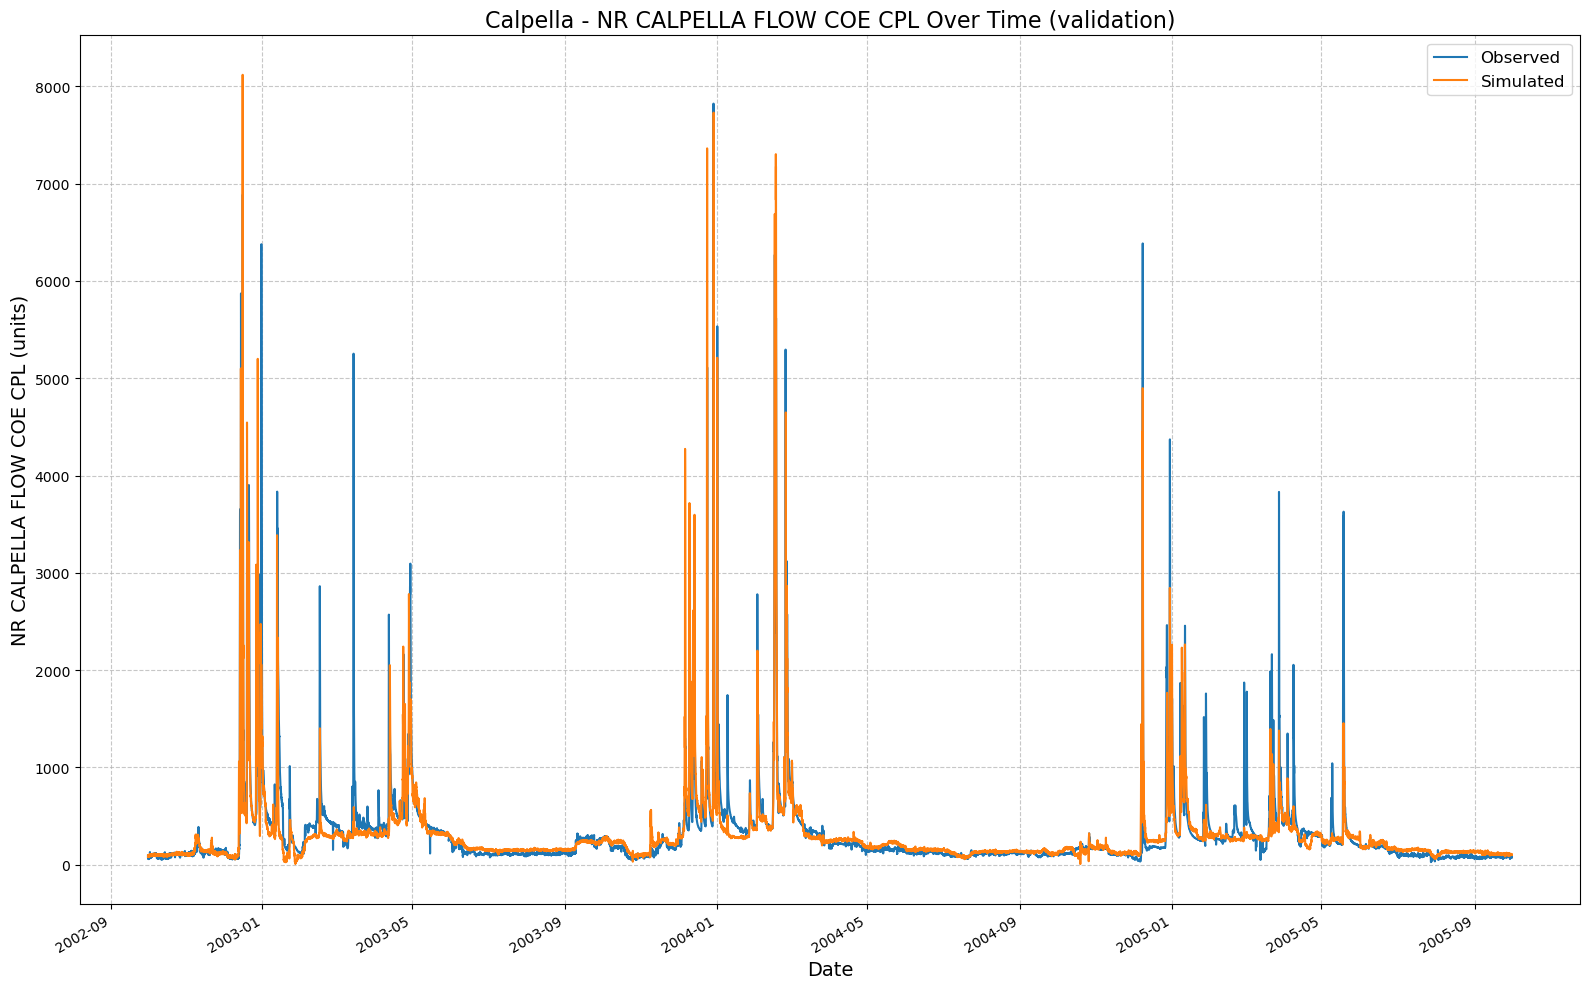

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_050127/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 06:04:59,426: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_060459/output.log initialized.
2025-02-14 06:04:59,427: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_060459
2025-02-14 06:04:59,427: ### Run configurations for testing_run
2025-02-14 06:04:59,428: experiment_name: testing_run
2025-02-14 06:04:59,428: train_basin_file: calpella
2025-02-14 06:04:59,428: validation_basin_file: calpella
2025-02-14 06:04:59,429: test_basin_file: calpella
2025-02-14 06:04:59,429: train_start_date: 1994-10-01 00:00:00
2025-02-14 06:04:59,430: train_end_date: 2002-09-30 00:00:00
2025-02-14 06:04

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
2025-02-14 06:05:00,530: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 466.45it/s]
2025-02-14 06:05:00,538: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [00:55<00:00,  4.48it/s, Loss: 0.0000]
2025-02-14 06:05:56,597: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [00:55<00:00,  4.53it/s, Loss: 0.0000]
2025-02-14 06:06:51,613: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [00:55<00:00,  4.47it/s, Loss: 0.0000]
2025-02-14 06:07:47,363: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [00:55<00:00,  4.46it/s, Loss: 0.0000]
2025-02-14 06:08:43,137: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [00:55<00:00,  4.47it/s, Loss: 0.0000]
2025-02-14 06:09:38,902: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:09<00:00,  9.97s/it]
2025-02-14 06:20:23,740: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_060459/validation/model_epoch016/validation_metrics.csv
2025-02-14 06:20:23,743: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_060459/validation/model_epoch016/validation_results.p
got predictions


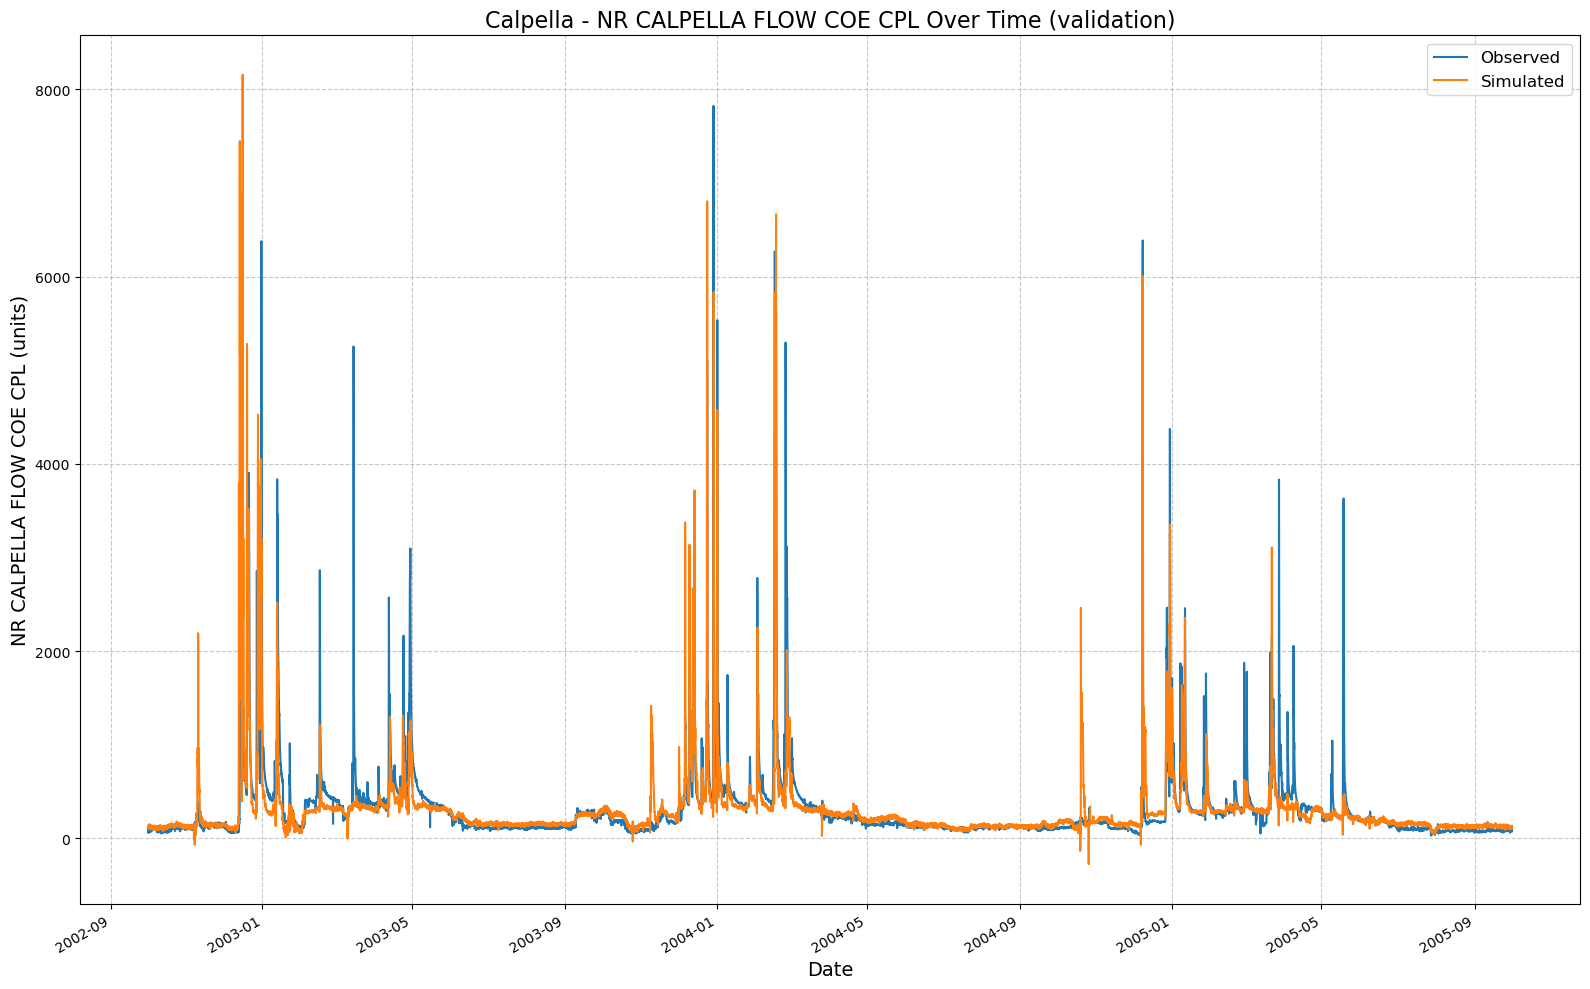

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_060459/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 06:20:24,013: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_062024/output.log initialized.
2025-02-14 06:20:24,013: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_062024
2025-02-14 06:20:24,014: ### Run configurations for testing_run
2025-02-14 06:20:24,014: experiment_name: testing_run
2025-02-14 06:20:24,014: train_basin_file: calpella
2025-02-14 06:20:24,014: validation_basin_file: calpella
2025-02-14 06:20:24,015: test_basin_file: calpella
2025-02-14 06:20:24,015: train_start_date: 1994-10-01 00:00:00
2025-02-14 06:20:24,015: train_end_date: 2002-09-30 00:00:00
2025-02-14 06:20

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
2025-02-14 06:20:25,109: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 496.54it/s]
2025-02-14 06:20:25,117: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [00:55<00:00,  4.50it/s, Loss: 0.0000]
2025-02-14 06:21:20,720: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [00:55<00:00,  4.50it/s, Loss: 0.0000]
2025-02-14 06:22:16,107: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [00:55<00:00,  4.47it/s, Loss: 0.0000]
2025-02-14 06:23:11,878: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [00:55<00:00,  4.46it/s, Loss: 0.0000]
2025-02-14 06:24:07,704: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [00:55<00:00,  4.48it/s, Loss: 0.0000]
2025-02-14 06:25:03,306: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:10<00:00, 10.37s/it]
2025-02-14 06:51:01,154: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_062024/validation/model_epoch032/validation_metrics.csv
2025-02-14 06:51:01,155: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_062024/validation/model_epoch032/validation_results.p
got predictions


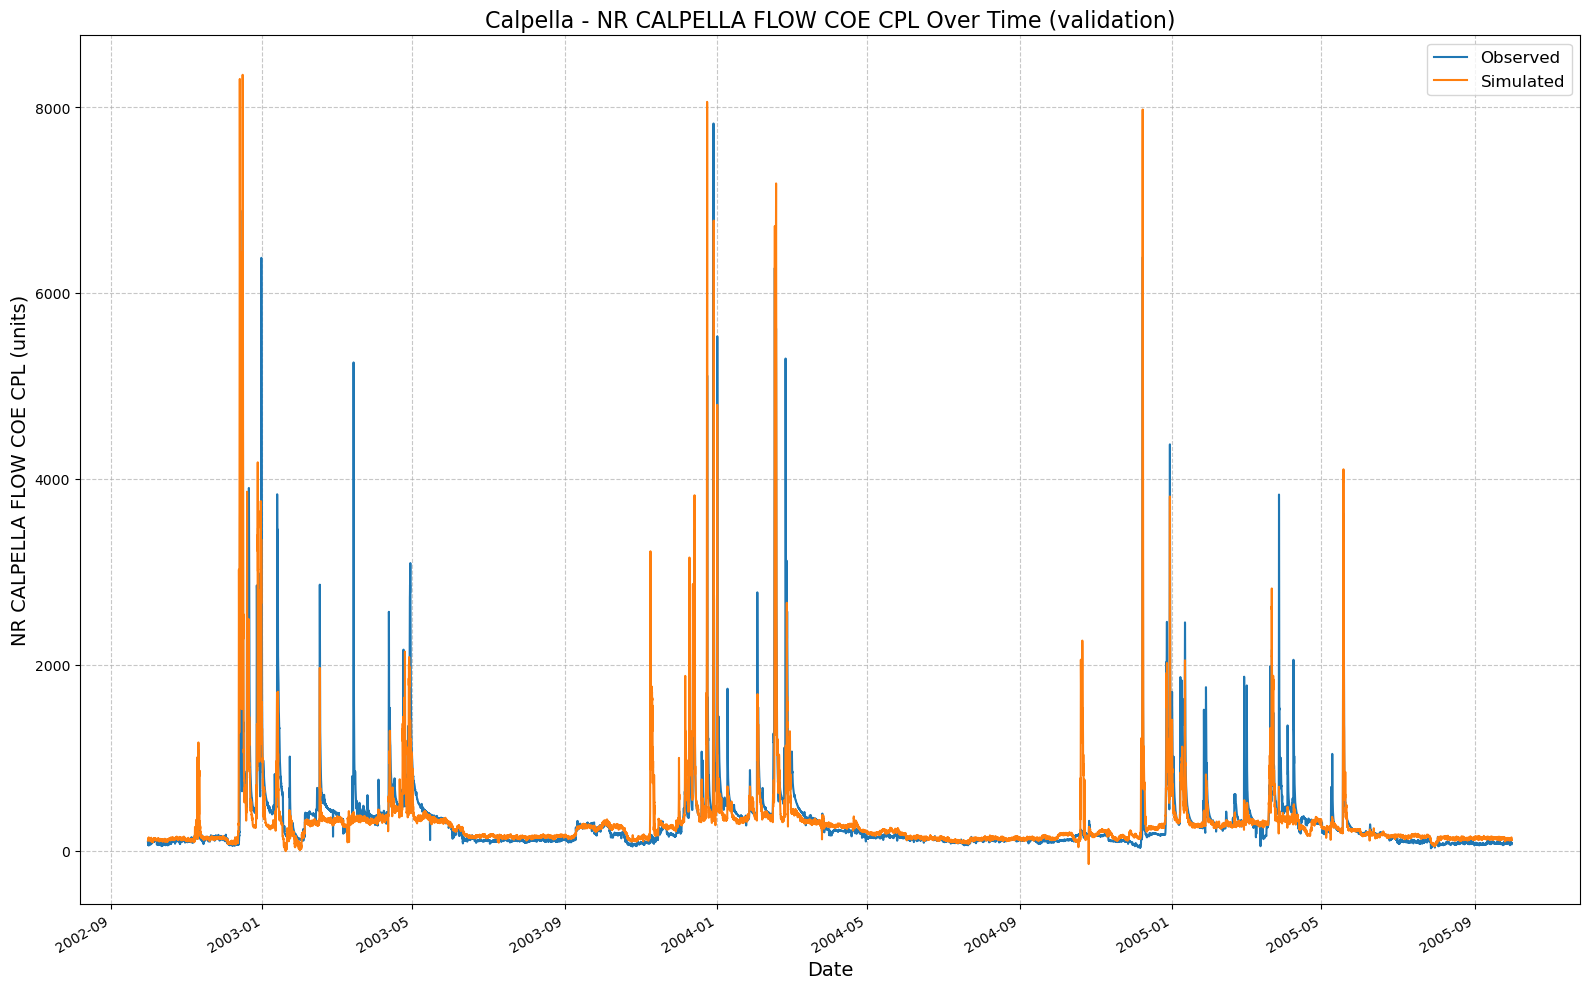

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_062024/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 168, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 06:51:01,450: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_065101/output.log initialized.
2025-02-14 06:51:01,451: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_065101
2025-02-14 06:51:01,451: ### Run configurations for testing_run
2025-02-14 06:51:01,452: experiment_name: testing_run
2025-02-14 06:51:01,452: train_basin_file: calpella
2025-02-14 06:51:01,453: validation_basin_file: calpella
2025-02-14 06:51:01,453: test_basin_file: calpella
2025-02-14 06:51:01,454: train_start_date: 1994-10-01 00:00:00
2025-02-14 06:51:01,454: train_end_date: 2002-09-30 00:00:00
2025-02-14 06:5

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
2025-02-14 06:51:02,645: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 540.78it/s]
2025-02-14 06:51:02,653: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [01:46<00:00,  2.34it/s, Loss: 0.0000]
2025-02-14 06:52:49,708: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [01:46<00:00,  2.34it/s, Loss: 0.0000]
2025-02-14 06:54:36,328: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [01:40<00:00,  2.48it/s, Loss: 0.0000]
2025-02-14 06:56:16,758: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [01:35<00:00,  2.60it/s, Loss: 0.0000]
2025-02-14 06:57:52,596: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [01:33<00:00,  2.67it/s, Loss: 0.0000]
2025-02-14 06:59:25,718: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:17<00:00, 17.93s/it]
2025-02-14 07:19:33,515: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_065101/validation/model_epoch016/validation_metrics.csv
2025-02-14 07:19:33,516: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_065101/validation/model_epoch016/validation_results.p
got predictions


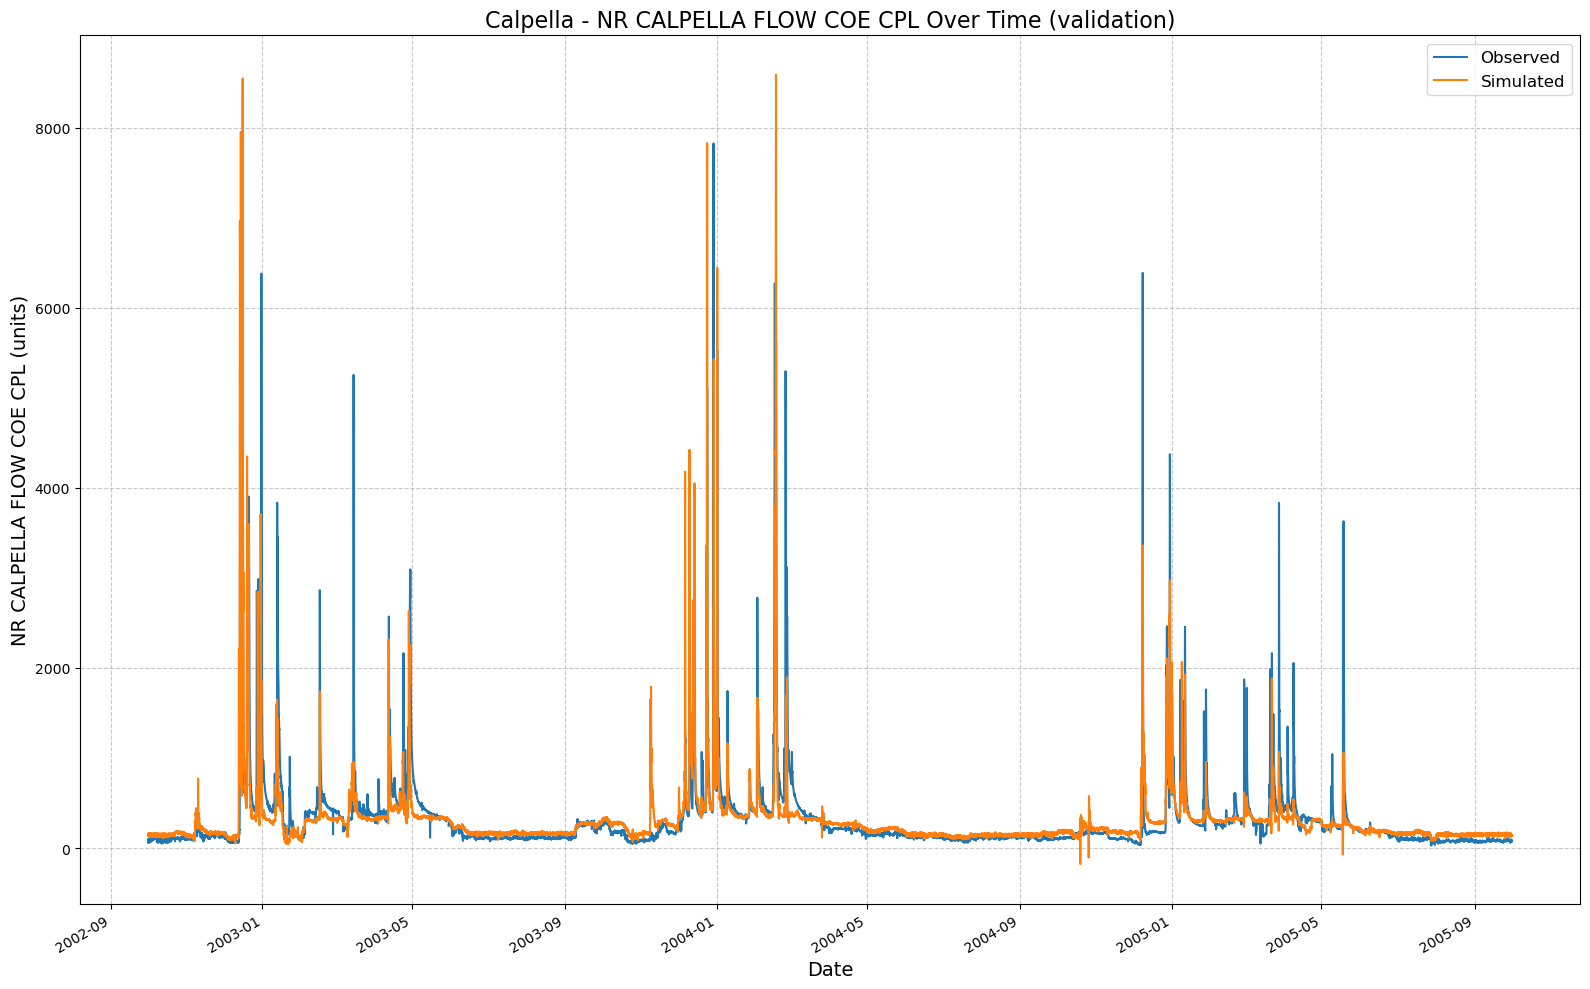

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_065101/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 168, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 07:19:33,817: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_071933/output.log initialized.
2025-02-14 07:19:33,818: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_071933
2025-02-14 07:19:33,818: ### Run configurations for testing_run
2025-02-14 07:19:33,819: experiment_name: testing_run
2025-02-14 07:19:33,819: train_basin_file: calpella
2025-02-14 07:19:33,820: validation_basin_file: calpella
2025-02-14 07:19:33,820: test_basin_file: calpella
2025-02-14 07:19:33,821: train_start_date: 1994-10-01 00:00:00
2025-02-14 07:19:33,821: train_end_date: 2002-09-30 00:00:00
2025-02-14 07:1

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.22s/it]
2025-02-14 07:19:35,089: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 221.48it/s]
2025-02-14 07:19:35,101: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [01:43<00:00,  2.41it/s, Loss: 0.0000]
2025-02-14 07:21:18,769: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [01:44<00:00,  2.38it/s, Loss: 0.0000]
2025-02-14 07:23:03,473: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [01:44<00:00,  2.39it/s, Loss: 0.0000]
2025-02-14 07:24:47,566: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [01:42<00:00,  2.42it/s, Loss: 0.0000]
2025-02-14 07:26:30,511: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [01:43<00:00,  2.41it/s, Loss: 0.0000]
2025-02-14 07:28:13,963: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:19<00:00, 19.40s/it]
2025-02-14 08:16:50,603: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_071933/validation/model_epoch032/validation_metrics.csv
2025-02-14 08:16:50,605: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_071933/validation/model_epoch032/validation_results.p
got predictions


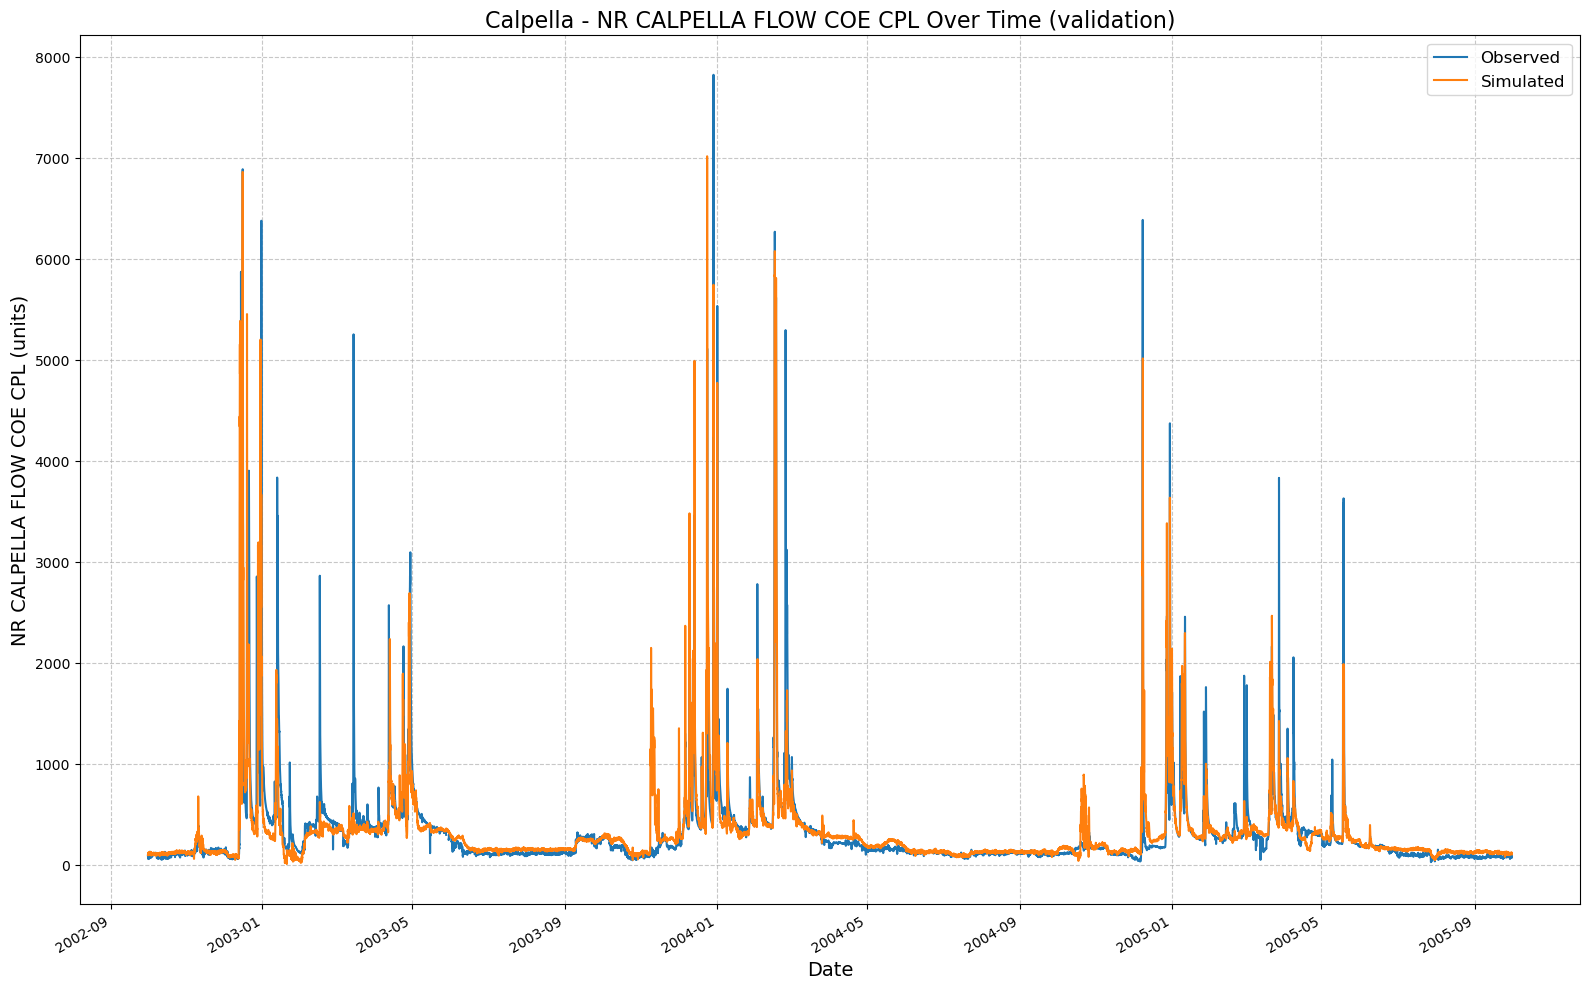

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_071933/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 336, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-02-14 08:16:50,918: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_081650/output.log initialized.
2025-02-14 08:16:50,918: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_081650
2025-02-14 08:16:50,919: ### Run configurations for testing_run
2025-02-14 08:16:50,919: experiment_name: testing_run
2025-02-14 08:16:50,920: train_basin_file: calpella
2025-02-14 08:16:50,920: validation_basin_file: calpella
2025-02-14 08:16:50,920: test_basin_file: calpella
2025-02-14 08:16:50,921: train_start_date: 1994-10-01 00:00:00
2025-02-14 08:16:50,921: train_end_date: 2002-09-30 00:00:00
2025-02-14 08:1

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.17s/it]
2025-02-14 08:16:52,125: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 442.62it/s]
2025-02-14 08:16:52,133: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [03:36<00:00,  1.15it/s, Loss: 0.0000]
2025-02-14 08:20:29,344: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [03:31<00:00,  1.18it/s, Loss: 0.0000]
2025-02-14 08:24:00,614: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [03:31<00:00,  1.18it/s, Loss: 0.0000]
2025-02-14 08:27:31,952: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [03:28<00:00,  1.19it/s, Loss: 0.0000]
2025-02-14 08:31:00,488: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [03:28<00:00,  1.20it/s, Loss: 0.0000]
2025-02-14 08:34:28,707: Epoc

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:39<00:00, 39.27s/it]
2025-02-14 09:16:11,938: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_081650/validation/model_epoch016/validation_metrics.csv
2025-02-14 09:16:11,940: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_081650/validation/model_epoch016/validation_results.p
got predictions


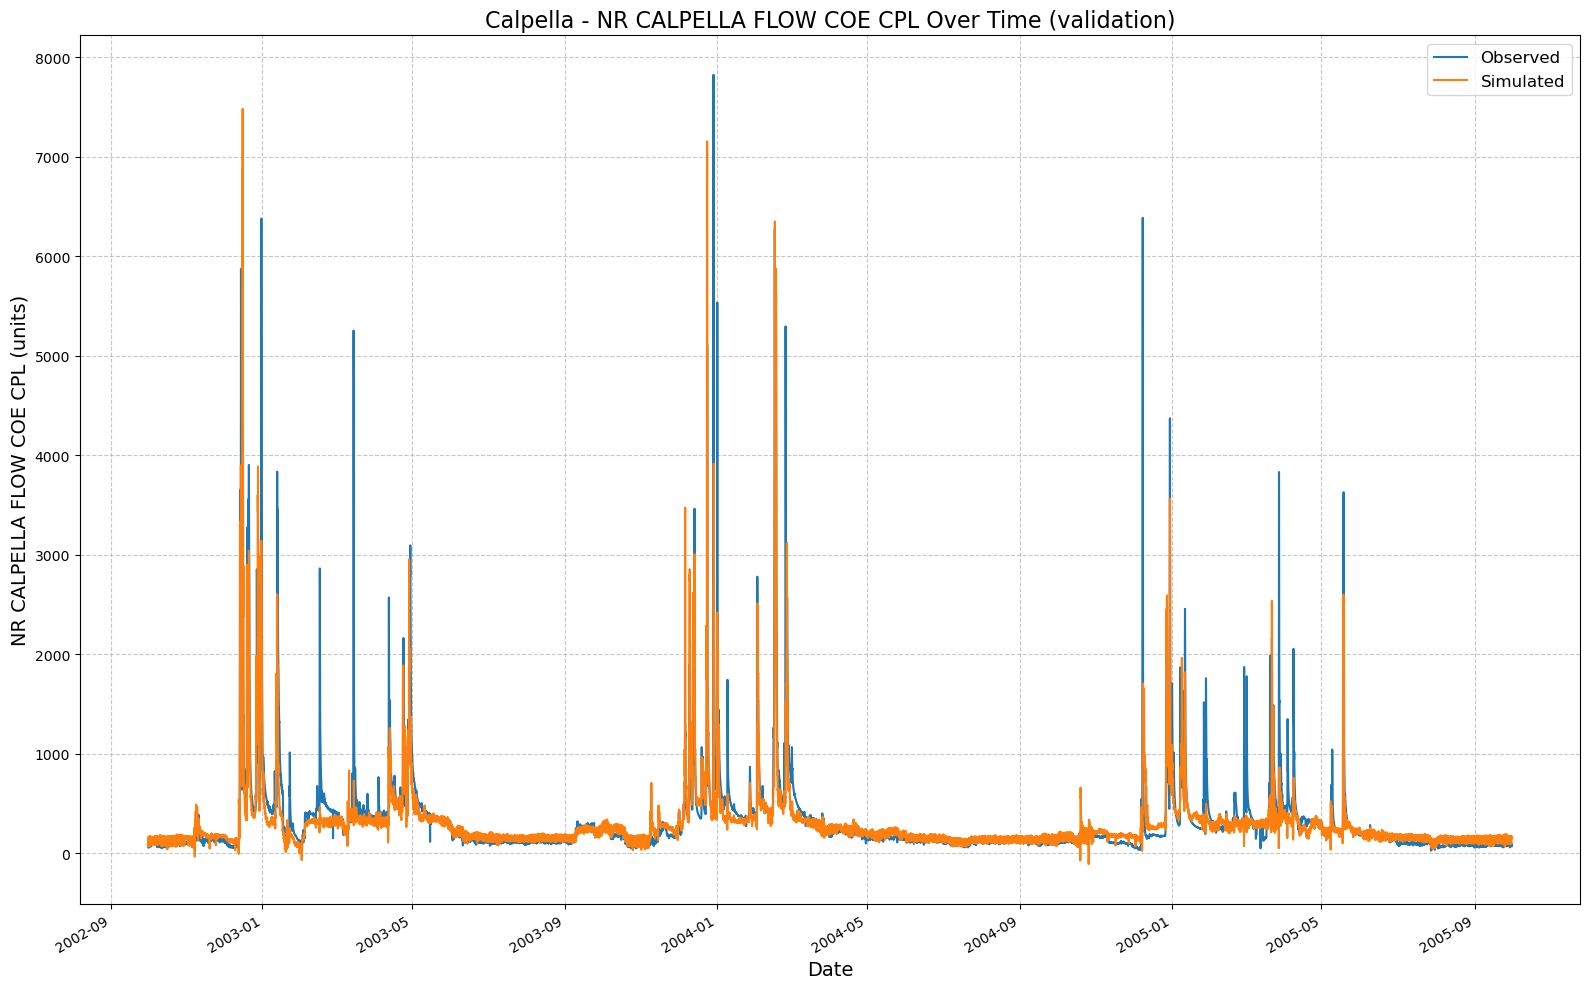

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_081650/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 336, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4}
2025-02-14 09:16:12,236: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_091612/output.log initialized.
2025-02-14 09:16:12,236: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_1402_091612
2025-02-14 09:16:12,237: ### Run configurations for testing_run
2025-02-14 09:16:12,237: experiment_name: testing_run
2025-02-14 09:16:12,237: train_basin_file: calpella
2025-02-14 09:16:12,238: validation_basin_file: calpella
2025-02-14 09:16:12,238: test_basin_file: calpella
2025-02-14 09:16:12,239: train_start_date: 1994-10-01 00:00:00
2025-02-14 09:16:12,239: train_end_date: 2002-09-30 00:00:00
2025-02-14 09:1

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]
2025-02-14 09:16:13,414: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 544.64it/s]
2025-02-14 09:16:13,421: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 249/249 [03:38<00:00,  1.14it/s, Loss: 0.0000]
2025-02-14 09:19:52,200: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 249/249 [03:33<00:00,  1.17it/s, Loss: 0.0000]
2025-02-14 09:23:25,661: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 249/249 [03:38<00:00,  1.14it/s, Loss: 0.0000]
2025-02-14 09:27:04,127: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 249/249 [03:32<00:00,  1.17it/s, Loss: 0.0000]
2025-02-14 09:30:36,981: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 249/249 [03:40<00:00,  1.13it/s, Loss: 0.0000]
2025-02-14 09:34:17,192: Epoc

In [ ]:
for (hs, seq, nl, ep) in itertools.product(
        hyperparam_space["hidden_size"],
        hyperparam_space["seq_length"],
        hyperparam_space["num_layers"],
        hyperparam_space["epochs"]
):
    hp = {
        "hidden_size": hs,
        "seq_length": seq,
        "num_layers": nl,
        "epochs": ep,
        "output_dropout": fixed_dropout,
    }
    print(f"NoPhysics: {hp}")
    trainer = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=hp,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=True,
        extend_train_period=False,
        gpu=-1
    )
    trainer.train()
    csv_path, metrics_dict = trainer.results()
    row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
    for k, v in metrics_dict.items():
        row_data[k] = v
    no_physics_results.append(row_data)

In [ ]:
for (hs, seq, nl, ep) in itertools.product(
        hyperparam_space["hidden_size"],
        hyperparam_space["seq_length"],
        hyperparam_space["num_layers"],
        hyperparam_space["epochs"]
):
    hp = {
        "hidden_size": hs,
        "seq_length": seq,
        "num_layers": nl,
        "epochs": ep,
        "output_dropout": fixed_dropout,
    }
    print(f"Physics: {hp}")
    trainer = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=hp,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=True,
        extend_train_period=False,
        gpu=-1
    )
    trainer.train()
    csv_path, metrics_dict = trainer.results()
    row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
    for k, v in metrics_dict.items():
        row_data[k] = v
    physics_results.append(row_data)

In [ ]:
df_no_physics = pd.DataFrame(no_physics_results)
df_physics = pd.DataFrame(physics_results)
df_no_physics.sort_values(by="NSE", ascending=False, inplace=True)
df_physics.sort_values(by="NSE", ascending=False, inplace=True)
df_no_physics.reset_index(drop=True, inplace=True)
df_physics.reset_index(drop=True, inplace=True)

In [ ]:
df_no_physics

In [ ]:
df_physics

In [ ]:
best_no_phys = df_no_physics.iloc[0].to_dict()
best_phys = df_physics.iloc[0].to_dict()

In [ ]:
best_no_physics_params = {
    "epochs": int(best_no_phys["epochs"]),
    "hidden_size": int(best_no_phys["hidden_size"]),
    "seq_length": int(best_no_phys["seq_length"]),
    "num_layers": int(best_no_phys["num_layers"]),
    "output_dropout": fixed_dropout,
}

lstmNoPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_no_physics_params,
    input_features=None,
    physics_informed=False,
    physics_data_file=None,
    hourly=True,
    extend_train_period=True,  
    gpu=-1
)

lstmNoPhysicsExtBest.train()
no_physics_test_csv, no_physics_test_metrics = lstmNoPhysicsExtBest.results('test')
no_physics_test_metrics

In [ ]:
best_physics_params = {
    "epochs": int(best_phys["epochs"]),
    "hidden_size": int(best_phys["hidden_size"]),
    "seq_length": int(best_phys["seq_length"]),
    "num_layers": int(best_phys["num_layers"]),
    "output_dropout": fixed_dropout,
}

lstmPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_physics_params,
    input_features=features_with_physics,
    physics_informed=True,
    physics_data_file=path_to_physics_data,
    hourly=True,
    extend_train_period=True,
    gpu=-1
)

lstmPhysicsExtBest.train()
physics_test_csv, physics_test_metrics = lstmPhysicsExtBest.results('test')
physics_test_metrics

In [ ]:
fancyCombinedPlot(lstm_results=no_physics_test_csv, lstmPhysics_results= physics_test_csv, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_metrics.csv")